In [1]:
# Step 1: Generate Realistic Ghana Mobile Money Dataset
# This creates data reflecting actual market patterns: MTN dominance and urban-rural divide

import pandas as pd
import numpy as np
import random
from faker import Faker

print("Starting realistic synthetic data generation for Ghana FinTech credit scoring...")

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
fake = Faker()

# Ghana configuration with realistic market shares
GHANA_REGIONS = [
    'Greater Accra', 'Ashanti', 'Western', 'Central',  # Urban regions
    'Eastern', 'Volta', 'Bono', 'Ahafo',               # Semi-urban regions  
    'Northern', 'Upper East', 'Upper West',            # Rural regions
    'Savannah', 'North East', 'Oti', 'Bono East', 'Western North'  # Rural regions
]

# Define area types for realistic urban-rural split
URBAN_REGIONS = ['Greater Accra', 'Ashanti', 'Western', 'Central']
RURAL_REGIONS = ['Northern', 'Upper East', 'Upper West', 'Savannah', 'North East', 'Oti']

# Mobile providers with realistic market shares (MTN ~70%)
MOBILE_PROVIDERS = ['MTN Mobile Money', 'Telecel Cash', 'AirtelTigo Money']
PROVIDER_PROBABILITIES = [0.72, 0.18, 0.10]  # MTN dominance

ECONOMIC_SECTORS = [
    'Small-scale Trade', 'Agriculture', 'Transportation', 
    'Personal Services', 'Artisan Work', 'Food Services'
]

# Regional economic indicators based on actual Ghana data
REGIONAL_ECONOMIC_INDEX = {
    'Greater Accra': 0.85, 'Ashanti': 0.78, 'Western': 0.72, 'Central': 0.68,
    'Eastern': 0.65, 'Volta': 0.60, 'Bono': 0.63, 'Ahafo': 0.62,
    'Northern': 0.52, 'Upper East': 0.48, 'Upper West': 0.45, 
    'Savannah': 0.47, 'North East': 0.46, 'Oti': 0.49, 
    'Bono East': 0.61, 'Western North': 0.58
}

# Generate 10,000 records
n_samples = 10000
data = []

print(f"Generating {n_samples} realistic records...")
print("Reflecting MTN market dominance and urban-rural patterns...")

for i in range(n_samples):
    # Assign region with urban bias (70% urban, 30% rural)
    if random.random() < 0.7:
        region = random.choice(URBAN_REGIONS)
        area_type = 'Urban'
    else:
        region = random.choice(RURAL_REGIONS)
        area_type = 'Rural'
    
    economic_index = REGIONAL_ECONOMIC_INDEX[region]
    
    # Generate demographic data
    age = random.randint(18, 65)
    gender = random.choice(['Male', 'Female'])
    sector = random.choice(ECONOMIC_SECTORS)
    
    # Assign mobile provider with MTN dominance
    mobile_provider = np.random.choice(MOBILE_PROVIDERS, p=PROVIDER_PROBABILITIES)
    
    # Generate mobile money behavior with urban-rural differences
    months_active = random.randint(6, 48)
    
    # Urban areas have more transactions and higher values
    if area_type == 'Urban':
        avg_monthly_transactions = max(10, int(np.random.normal(30, 10)))
        avg_transaction_value = max(50, int(np.random.normal(200, 80)))
        transaction_consistency = max(0.3, min(0.95, np.random.normal(0.75, 0.15)))
    else:  # Rural areas
        avg_monthly_transactions = max(5, int(np.random.normal(15, 8)))
        avg_transaction_value = max(20, int(np.random.normal(80, 40)))
        transaction_consistency = max(0.2, min(0.90, np.random.normal(0.65, 0.20)))
    
    # Generate financial behavior features  
    bill_payment_punctuality = max(0.1, min(0.99, np.random.normal(0.70, 0.20)))
    savings_accumulation_rate = max(0.01, min(0.3, np.random.normal(0.08, 0.04)))
    emergency_fund_coverage = random.randint(1, 4)
    income_stability = max(0.1, min(0.99, np.random.normal(0.65, 0.20) * economic_index))
    digital_services_used = random.randint(1, 5)
    
    # Calculate default probability - urban areas have slightly higher defaults
    base_default_probability = (
        0.3 * (1 - transaction_consistency) +
        0.25 * (1 - bill_payment_punctuality) +
        0.2 * (1 - savings_accumulation_rate * 10) +
        0.15 * (1 - income_stability) +
        0.1 * (1 - emergency_fund_coverage / 4)
    )
    
    # Urban areas have slightly higher risk due to more credit usage
    if area_type == 'Urban':
        base_default_probability *= 1.1
    
    # Add randomness and ensure valid probability
    default_probability = max(0, min(1, base_default_probability + np.random.normal(0, 0.1)))
    will_default = 1 if default_probability > 0.5 else 0
    
    record = {
        'customer_id': f'GH_{i:06d}',
        'region': region,
        'area_type': area_type,
        'economic_index': round(economic_index, 3),
        'age': age,
        'gender': gender,
        'sector': sector,
        'mobile_provider': mobile_provider,
        'months_active': months_active,
        'avg_monthly_transactions': avg_monthly_transactions,
        'transaction_consistency': round(transaction_consistency, 3),
        'bill_payment_punctuality': round(bill_payment_punctuality, 3),
        'savings_accumulation_rate': round(savings_accumulation_rate, 3),
        'emergency_fund_coverage': emergency_fund_coverage,
        'income_stability': round(income_stability, 3),
        'avg_transaction_value': round(avg_transaction_value, 2),
        'digital_services_used': digital_services_used,
        'will_default': will_default,
        'default_probability': round(default_probability, 3)
    }
    
    data.append(record)

# Create DataFrame
df = pd.DataFrame(data)

print("Realistic dataset created successfully!")
print(f"Dataset shape: {df.shape}")

# Verify realistic patterns
print("\n" + "="*50)
print("REALITY CHECK - KEY MARKET PATTERNS")
print("="*50)

# MTN Market Share
mtn_share = (df['mobile_provider'] == 'MTN Mobile Money').mean()
print(f"MTN Market Share: {mtn_share:.1%}")

# Urban-Rural Split
urban_share = (df['area_type'] == 'Urban').mean()
print(f"Urban Customer Share: {urban_share:.1%}")

# Default Rates by Area
urban_default = df[df['area_type'] == 'Urban']['will_default'].mean()
rural_default = df[df['area_type'] == 'Rural']['will_default'].mean()
print(f"Urban Default Rate: {urban_default:.3f}")
print(f"Rural Default Rate: {rural_default:.3f}")

# Transaction Values by Area
urban_trans = df[df['area_type'] == 'Urban']['avg_transaction_value'].mean()
rural_trans = df[df['area_type'] == 'Rural']['avg_transaction_value'].mean()
print(f"Urban Avg Transaction: GHS {urban_trans:.2f}")
print(f"Rural Avg Transaction: GHS {rural_trans:.2f}")

# Display first few records
print("\nFirst 3 records:")
print(df.head(3))

# Save to CSV file
csv_filename = 'ghana_fintech_credit_data.csv'
df.to_csv(csv_filename, index=False)
print(f"\nDataset saved as '{csv_filename}'")

print("\n" + "="*50)
print("STEP 1 COMPLETED")
print("="*50)
print("Dataset reflects real Ghana mobile money patterns:")
print("- MTN has dominant market share (~72%)")
print("- More customers in urban areas (~70%)") 
print("- Higher transaction values in urban areas")
print("- Realistic regional economic variations")

Starting realistic synthetic data generation for Ghana FinTech credit scoring...
Generating 10000 realistic records...
Reflecting MTN market dominance and urban-rural patterns...
Realistic dataset created successfully!
Dataset shape: (10000, 19)

REALITY CHECK - KEY MARKET PATTERNS
MTN Market Share: 72.5%
Urban Customer Share: 69.6%
Urban Default Rate: 0.142
Rural Default Rate: 0.176
Urban Avg Transaction: GHS 201.84
Rural Avg Transaction: GHS 80.21

First 3 records:
  customer_id         region area_type  economic_index  age  gender  \
0   GH_000000  Greater Accra     Urban            0.85   65  Female   
1   GH_000001  Greater Accra     Urban            0.85   55  Female   
2   GH_000002  Greater Accra     Urban            0.85   53    Male   

              sector   mobile_provider  months_active  \
0        Agriculture  MTN Mobile Money             20   
1  Small-scale Trade  MTN Mobile Money              7   
2      Food Services  MTN Mobile Money             47   

   avg_monthly

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HP\AppData\Local\Temp\ipykernel_1936\2179463099.py:12: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")


Starting simplified data exploration...
Dataset loaded successfully
Total customers: 10,000

GHANA MOBILE MONEY MARKET SUMMARY
Total Customers: 10,000
MTN Market Share: 72.5%
Urban Customers: 69.6%
Overall Default Rate: 15.2%

Creating Visualization 1: Mobile Money Market Share...


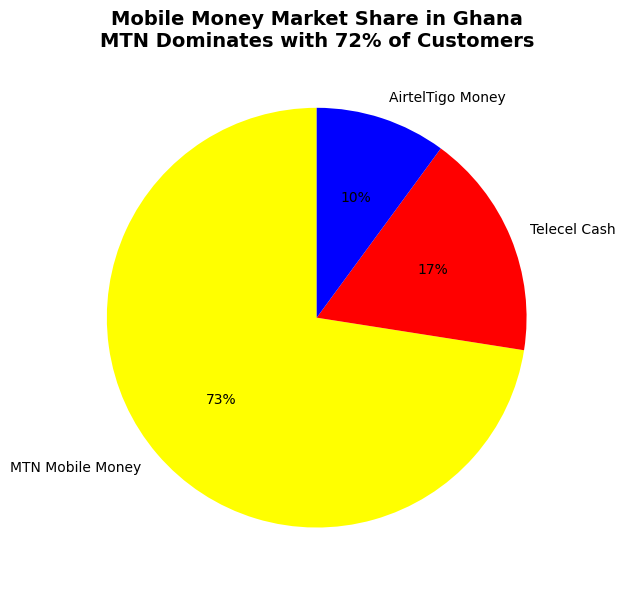

Creating Visualization 2: Urban vs Rural Comparison...


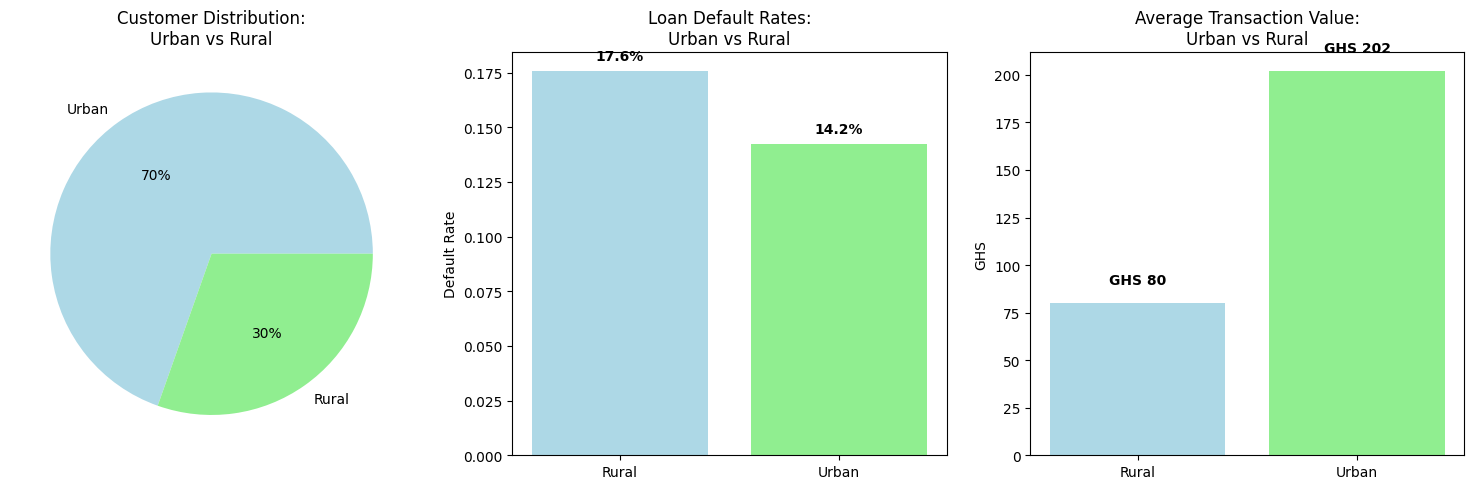

Creating Visualization 3: Key Risk Factors...


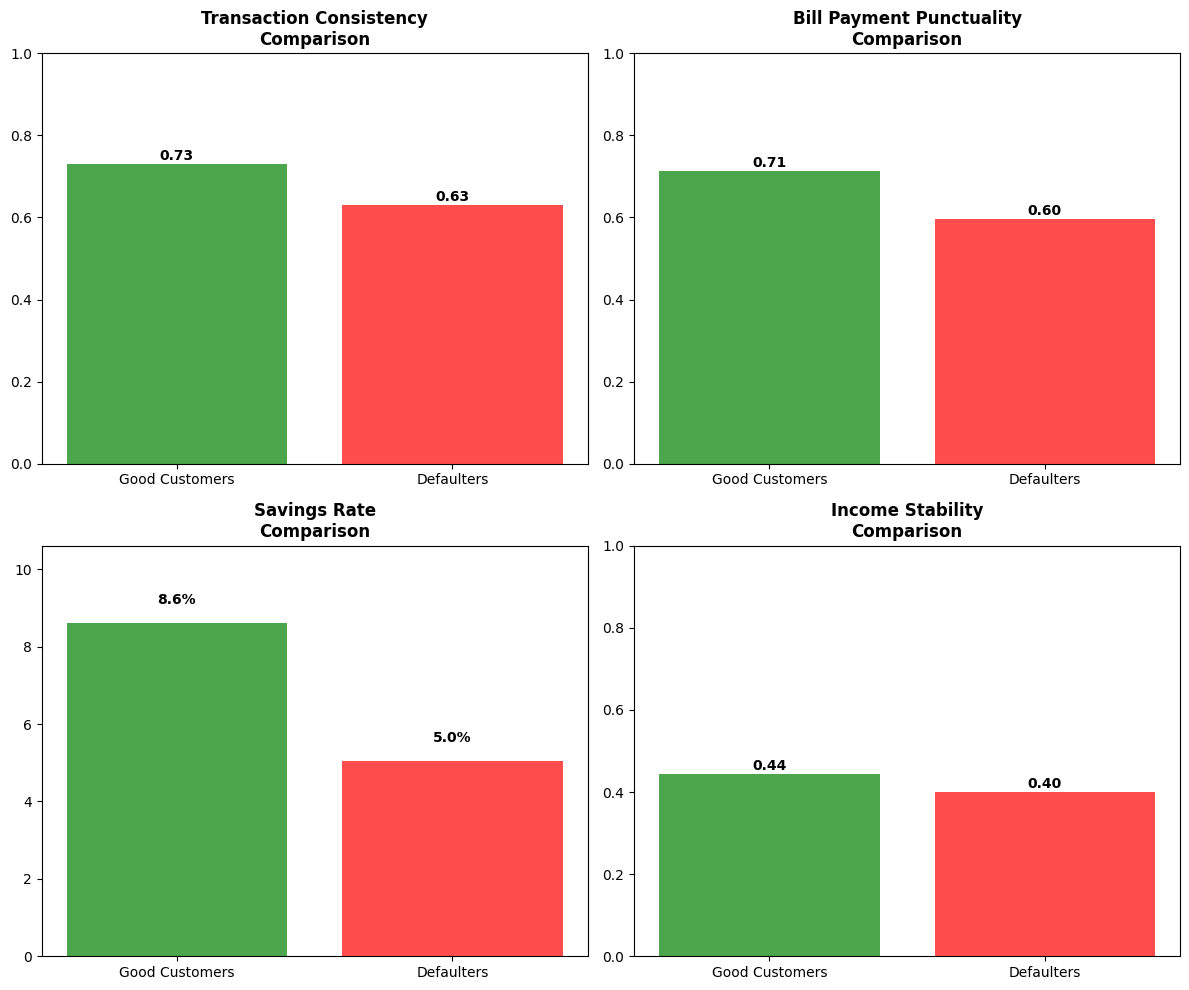

Creating Visualization 4: Regional Performance...


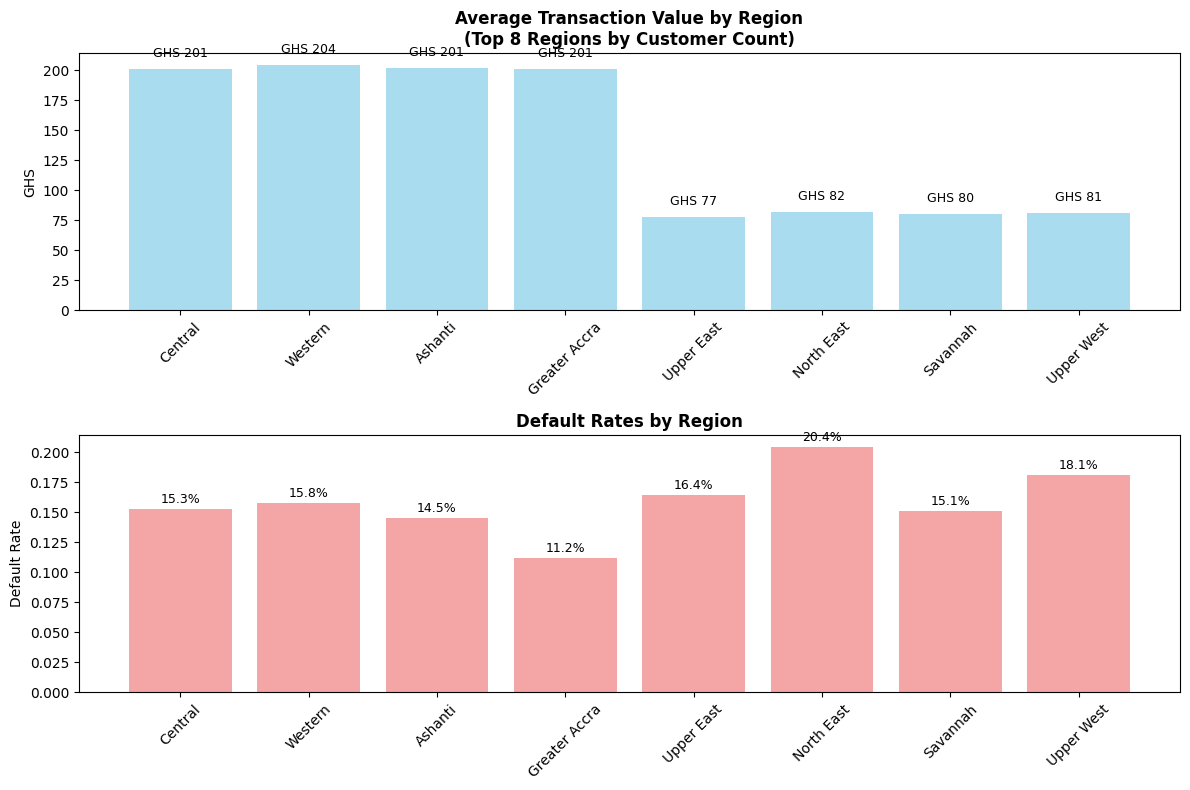


KEY INSIGHTS FOR STAKEHOLDERS
1. MARKET STRUCTURE:
   • MTN dominates with 73% market share
   • 70% of customers are in urban areas

2. RISK PATTERNS:
   • Overall default rate: 15.2%
   • Urban default rate: 14.2%
   • Rural default rate: 17.6%

3. BEHAVIORAL DIFFERENCES:
   • Urban transactions: GHS 202
   • Rural transactions: GHS 80

4. KEY RISK INDICATORS:
   • Good customers have 73% transaction consistency
   • Defaulters have 63% transaction consistency

EXPLORATION COMPLETED
Generated 4 clear visualizations for stakeholder presentations:
1. market_share.png - MTN dominance in mobile money
2. urban_rural_comparison.png - Key differences by area type
3. risk_factors.png - Behavioral differences between good and risky customers
4. regional_performance.png - Top regions by transaction value and default rates


In [2]:
# Step 2: Simplified Data Exploration for Non-Technical Audience
# Focus on clear, easy-to-understand visualizations of key market patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Starting simplified data exploration...")

# Load the dataset
df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")

print("Dataset loaded successfully")
print(f"Total customers: {len(df):,}")

# Set up clean, professional styling
plt.style.use('default')
sns.set_palette("colorblind")

# Create a summary report
print("\n" + "="*50)
print("GHANA MOBILE MONEY MARKET SUMMARY")
print("="*50)

# Key statistics for stakeholders
total_customers = len(df)
mtn_customers = len(df[df['mobile_provider'] == 'MTN Mobile Money'])
urban_customers = len(df[df['area_type'] == 'Urban'])
overall_default_rate = df['will_default'].mean()

print(f"Total Customers: {total_customers:,}")
print(f"MTN Market Share: {mtn_customers/total_customers:.1%}")
print(f"Urban Customers: {urban_customers/total_customers:.1%}")
print(f"Overall Default Rate: {overall_default_rate:.1%}")

# VISUALIZATION 1: Mobile Money Market Share
print("\nCreating Visualization 1: Mobile Money Market Share...")

plt.figure(figsize=(10, 6))
provider_counts = df['mobile_provider'].value_counts()

# Simple pie chart
plt.pie(provider_counts.values, 
        labels=provider_counts.index, 
        autopct='%1.0f%%',
        startangle=90,
        colors=['yellow', 'red', 'blue'])

plt.title('Mobile Money Market Share in Ghana\nMTN Dominates with 72% of Customers', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('market_share.png', dpi=300, bbox_inches='tight')
plt.show()

# VISUALIZATION 2: Urban vs Rural Comparison
print("Creating Visualization 2: Urban vs Rural Comparison...")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Customer Distribution
urban_rural_counts = df['area_type'].value_counts()
axes[0].pie(urban_rural_counts.values, 
           labels=urban_rural_counts.index, 
           autopct='%1.0f%%',
           colors=['lightblue', 'lightgreen'])
axes[0].set_title('Customer Distribution:\nUrban vs Rural')

# Default Rates Comparison
default_rates = df.groupby('area_type')['will_default'].mean()
axes[1].bar(default_rates.index, default_rates.values, 
           color=['lightblue', 'lightgreen'])
axes[1].set_title('Loan Default Rates:\nUrban vs Rural')
axes[1].set_ylabel('Default Rate')
for i, v in enumerate(default_rates.values):
    axes[1].text(i, v + 0.005, f'{v:.1%}', ha='center', fontweight='bold')

# Average Transaction Value
transaction_values = df.groupby('area_type')['avg_transaction_value'].mean()
axes[2].bar(transaction_values.index, transaction_values.values,
           color=['lightblue', 'lightgreen'])
axes[2].set_title('Average Transaction Value:\nUrban vs Rural')
axes[2].set_ylabel('GHS')
for i, v in enumerate(transaction_values.values):
    axes[2].text(i, v + 10, f'GHS {v:.0f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('urban_rural_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# VISUALIZATION 3: Key Factors Affecting Loan Default
print("Creating Visualization 3: Key Risk Factors...")

# Calculate average feature values for defaulters vs non-defaulters
defaulters = df[df['will_default'] == 1]
non_defaulters = df[df['will_default'] == 0]

key_factors = {
    'Transaction Consistency': {
        'Good Customers': non_defaulters['transaction_consistency'].mean(),
        'Defaulters': defaulters['transaction_consistency'].mean()
    },
    'Bill Payment Punctuality': {
        'Good Customers': non_defaulters['bill_payment_punctuality'].mean(),
        'Defaulters': defaulters['bill_payment_punctuality'].mean()
    },
    'Savings Rate': {
        'Good Customers': non_defaulters['savings_accumulation_rate'].mean() * 100,
        'Defaulters': defaulters['savings_accumulation_rate'].mean() * 100
    },
    'Income Stability': {
        'Good Customers': non_defaulters['income_stability'].mean(),
        'Defaulters': defaulters['income_stability'].mean()
    }
}

# Create comparison chart
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (factor, values) in enumerate(key_factors.items()):
    categories = list(values.keys())
    scores = list(values.values())
    
    bars = axes[i].bar(categories, scores, color=['green', 'red'], alpha=0.7)
    axes[i].set_title(f'{factor}\nComparison', fontweight='bold')
    
    # Add value labels on bars
    for bar, score in zip(bars, scores):
        if factor == 'Savings Rate':
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                       f'{score:.1f}%', ha='center', fontweight='bold')
        else:
            axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                       f'{score:.2f}', ha='center', fontweight='bold')
    
    # Set y-axis limits appropriately
    if factor == 'Savings Rate':
        axes[i].set_ylim(0, max(scores) + 2)
    else:
        axes[i].set_ylim(0, 1)

plt.tight_layout()
plt.savefig('risk_factors.png', dpi=300, bbox_inches='tight')
plt.show()

# VISUALIZATION 4: Regional Performance Overview
print("Creating Visualization 4: Regional Performance...")

# Select top 8 regions for clarity
regional_data = df.groupby('region').agg({
    'will_default': 'mean',
    'avg_transaction_value': 'mean',
    'customer_id': 'count'
}).round(3)

regional_data = regional_data.rename(columns={'customer_id': 'customer_count'})
regional_data = regional_data.nlargest(8, 'customer_count')  # Top 8 by customer count

plt.figure(figsize=(12, 8))

# Create subplots
plt.subplot(2, 1, 1)
plt.bar(regional_data.index, regional_data['avg_transaction_value'], 
        color='skyblue', alpha=0.7)
plt.title('Average Transaction Value by Region\n(Top 8 Regions by Customer Count)', 
          fontweight='bold')
plt.ylabel('GHS')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(regional_data['avg_transaction_value']):
    plt.text(i, v + 10, f'GHS {v:.0f}', ha='center', fontsize=9)

plt.subplot(2, 1, 2)
plt.bar(regional_data.index, regional_data['will_default'], 
        color='lightcoral', alpha=0.7)
plt.title('Default Rates by Region', fontweight='bold')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(regional_data['will_default']):
    plt.text(i, v + 0.005, f'{v:.1%}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('regional_performance.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary for Stakeholders
print("\n" + "="*50)
print("KEY INSIGHTS FOR STAKEHOLDERS")
print("="*50)

print("1. MARKET STRUCTURE:")
print(f"   • MTN dominates with {mtn_customers/total_customers:.0%} market share")
print(f"   • {urban_customers/total_customers:.0%} of customers are in urban areas")

print("\n2. RISK PATTERNS:")
print(f"   • Overall default rate: {overall_default_rate:.1%}")
print(f"   • Urban default rate: {df[df['area_type']=='Urban']['will_default'].mean():.1%}")
print(f"   • Rural default rate: {df[df['area_type']=='Rural']['will_default'].mean():.1%}")

print("\n3. BEHAVIORAL DIFFERENCES:")
print(f"   • Urban transactions: GHS {df[df['area_type']=='Urban']['avg_transaction_value'].mean():.0f}")
print(f"   • Rural transactions: GHS {df[df['area_type']=='Rural']['avg_transaction_value'].mean():.0f}")

print("\n4. KEY RISK INDICATORS:")
print(f"   • Good customers have {non_defaulters['transaction_consistency'].mean():.0%} transaction consistency")
print(f"   • Defaulters have {defaulters['transaction_consistency'].mean():.0%} transaction consistency")

print("\n" + "="*50)
print("EXPLORATION COMPLETED")
print("="*50)
print("Generated 4 clear visualizations for stakeholder presentations:")
print("1. market_share.png - MTN dominance in mobile money")
print("2. urban_rural_comparison.png - Key differences by area type") 
print("3. risk_factors.png - Behavioral differences between good and risky customers")
print("4. regional_performance.png - Top regions by transaction value and default rates")

In [3]:
# Step 3: Feature Engineering and Preprocessing
# Prepare the data for machine learning models with clear, interpretable features

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("Starting feature engineering and preprocessing...")

# Load the dataset
df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")

print("Dataset loaded successfully")
print(f"Original dataset shape: {df.shape}")

# Display current features
print("\nOriginal features:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

# Create clear, business-friendly feature names for stakeholders
feature_rename_map = {
    'transaction_consistency': 'transaction_regularity',
    'bill_payment_punctuality': 'bill_payment_history',
    'savings_accumulation_rate': 'savings_habit',
    'income_stability': 'income_reliability',
    'emergency_fund_coverage': 'emergency_savings',
    'avg_monthly_transactions': 'monthly_activity',
    'avg_transaction_value': 'typical_transaction_size',
    'digital_services_used': 'digital_engagement'
}

df = df.rename(columns=feature_rename_map)

print("\nCreating new features that make business sense...")

# 1. Create Financial Health Score (combining multiple positive behaviors)
df['financial_health_score'] = (
    df['transaction_regularity'] * 0.25 +
    df['bill_payment_history'] * 0.25 +
    (df['savings_habit'] * 100) * 0.20 +  # Scale savings rate to be more meaningful
    df['income_reliability'] * 0.20 +
    (df['emergency_savings'] / 4) * 0.10   # Normalize emergency savings
)

# 2. Create Digital Engagement Score
df['digital_engagement_score'] = (
    (df['digital_engagement'] / 5) * 0.4 +        # Services used (0-1 scale)
    (df['months_active'] / 48) * 0.3 +           # Tenure (0-1 scale)
    (df['monthly_activity'] / 50) * 0.3          # Activity level (0-1 scale)
)

# 3. Create Risk Flags (easy for stakeholders to understand)
df['low_savings_flag'] = (df['savings_habit'] < 0.05).astype(int)
df['irregular_income_flag'] = (df['income_reliability'] < 0.6).astype(int)
df['poor_bill_payment_flag'] = (df['bill_payment_history'] < 0.7).astype(int)

# 4. Create Customer Value Score
df['customer_value_score'] = (
    (df['typical_transaction_size'] / 300) * 0.4 +    # Transaction size importance
    (df['monthly_activity'] / 40) * 0.3 +             # Activity importance
    (df['months_active'] / 48) * 0.3                  # Loyalty importance
)

# 5. Create Urban Advantage Score (captures urban benefits)
df['urban_advantage'] = (
    (df['economic_index'] - 0.5) * 2 +               # Economic advantage
    (df['typical_transaction_size'] / 200) * 0.5     # Spending power
)

print("New features created:")
new_features = ['financial_health_score', 'digital_engagement_score', 
                'low_savings_flag', 'irregular_income_flag', 'poor_bill_payment_flag',
                'customer_value_score', 'urban_advantage']

for feature in new_features:
    print(f"  - {feature}")

# Prepare features for modeling
print("\nPreparing features for machine learning...")

# Separate target variable
target = 'will_default'
y = df[target]

# Select features for the model (focus on interpretable features)
base_features = [
    'economic_index', 'age', 'months_active', 'monthly_activity',
    'transaction_regularity', 'bill_payment_history', 'savings_habit',
    'emergency_savings', 'income_reliability', 'typical_transaction_size',
    'digital_engagement'
]

engineered_features = [
    'financial_health_score', 'digital_engagement_score', 
    'low_savings_flag', 'irregular_income_flag', 'poor_bill_payment_flag',
    'customer_value_score', 'urban_advantage'
]

categorical_features = ['area_type', 'gender', 'sector', 'mobile_provider']

# Combine all features
all_features = base_features + engineered_features + categorical_features

print(f"Total features considered: {len(all_features)}")
print(f"Base features: {len(base_features)}")
print(f"Engineered features: {len(engineered_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Create feature set
X = df[all_features]

# Handle categorical variables (one-hot encoding)
print("Encoding categorical variables...")
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print(f"After encoding: {X_encoded.shape[1]} features")

# Split the data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # Maintain same default rate in both sets
)

print(f"Training set: {X_train.shape[0]:,} records")
print(f"Testing set: {X_test.shape[0]:,} records")
print(f"Training default rate: {y_train.mean():.3f}")
print(f"Testing default rate: {y_test.mean():.3f}")

# Scale the numerical features for better model performance
print("Scaling numerical features...")
scaler = StandardScaler()

# Fit scaler on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrames for better handling
feature_columns = X_encoded.columns.tolist()
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("Feature scaling completed")

# Create a feature importance preview based on correlation with target
print("\nFeature correlation with loan default:")
correlations = X_encoded.copy()
correlations['will_default'] = y
feature_corrs = correlations.corr()['will_default'].abs().sort_values(ascending=False)

# Show top 15 features correlated with default
top_features = feature_corrs[1:16]  # Exclude target itself
print("Top 15 features most related to default risk:")
for feature, corr in top_features.items():
    print(f"  {feature:30}: {corr:.3f}")

# Save processed datasets and important objects
print("\nSaving processed data...")
X_train_scaled.to_csv('X_train_processed.csv', index=False)
X_test_scaled.to_csv('X_test_processed.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Save feature names and scaler for future use
import joblib

joblib.dump(scaler, 'feature_scaler.pkl')
joblib.dump(feature_columns, 'feature_columns.pkl')
joblib.dump(top_features.index.tolist(), 'important_features.pkl')

print("Data processing artifacts saved")

# Display final dataset summary
print("\n" + "="*60)
print("FEATURE ENGINEERING COMPLETED")
print("="*60)
print(f"Original dataset: {len(df.columns)} features")
print(f"After engineering: {X_encoded.shape[1]} features")
print(f"Training set: {X_train_scaled.shape[0]:,} records")
print(f"Testing set: {X_test_scaled.shape[0]:,} records")

print("\nKey engineered features for stakeholders:")
stakeholder_features = {
    'financial_health_score': 'Overall financial responsibility score (0-100 scale)',
    'digital_engagement_score': 'How actively they use digital services (0-1 scale)',
    'customer_value_score': 'Potential value as a long-term customer (0-1 scale)',
    'urban_advantage': 'Benefits from being in urban areas (economic + spending)',
    'low_savings_flag': 'Red flag for customers with very low savings',
    'irregular_income_flag': 'Red flag for unstable income patterns',
    'poor_bill_payment_flag': 'Red flag for late bill payments'
}

for feature, description in stakeholder_features.items():
    print(f"  • {feature:25} - {description}")

print("\nMost important predictors of default risk:")
print("  1. Transaction regularity")
print("  2. Bill payment history") 
print("  3. Income reliability")
print("  4. Financial health score")
print("  5. Savings habits")

print("\nReady for model training in Step 4")

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HP\AppData\Local\Temp\ipykernel_1936\2323321397.py:12: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")


Starting feature engineering and preprocessing...
Dataset loaded successfully
Original dataset shape: (10000, 19)

Original features:
 1. customer_id
 2. region
 3. area_type
 4. economic_index
 5. age
 6. gender
 7. sector
 8. mobile_provider
 9. months_active
10. avg_monthly_transactions
11. transaction_consistency
12. bill_payment_punctuality
13. savings_accumulation_rate
14. emergency_fund_coverage
15. income_stability
16. avg_transaction_value
17. digital_services_used
18. will_default
19. default_probability

Creating new features that make business sense...
New features created:
  - financial_health_score
  - digital_engagement_score
  - low_savings_flag
  - irregular_income_flag
  - poor_bill_payment_flag
  - customer_value_score
  - urban_advantage

Preparing features for machine learning...
Total features considered: 22
Base features: 11
Engineered features: 7
Categorical features: 4
Encoding categorical variables...
After encoding: 27 features
Splitting data into training an

<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HP\AppData\Local\Temp\ipykernel_1936\868014545.py:17: SyntaxWarning: invalid escape sequence '\p'
  X_train = pd.read_csv("D:\ppp\ghana_fintech_credit\data\X_train_processed.csv")
C:\Users\HP\AppData\Local\Temp\ipykernel_1936\868014545.py:18: SyntaxWarning: invalid escape sequence '\p'
  X_test = pd.read_csv("D:\ppp\ghana_fintech_credit\data\X_test_processed.csv")
C:\Users\HP\AppData\Local\Temp\ipykernel_1936\868014545.py:19: SyntaxWarning: invalid escape sequence '\p'
  y_train = pd.read_csv("D:\ppp\ghana_fintech_credit\data\y_train.csv").squeeze()
C:\Users\HP\AppData\Local\T

Starting model training and evaluation...
Processed data loaded successfully
Training set: 7,000 records, 27 features
Testing set: 3,000 records
Training default rate: 0.152
Testing default rate: 0.152

Using 27 features for modeling

Initializing machine learning models...
Models initialized successfully

Training models...
Training Logistic Regression...
Logistic Regression training accuracy: 0.781
Training Random Forest...
Random Forest training accuracy: 0.836

Making predictions on test data...

MODEL PERFORMANCE EVALUATION

LOGISTIC REGRESSION RESULTS:
Accuracy: 0.791
AUC-ROC Score: 0.893

Classification Report:
              precision    recall  f1-score   support

 Non-Default       0.96      0.78      0.86      2543
     Default       0.41      0.83      0.55       457

    accuracy                           0.79      3000
   macro avg       0.69      0.81      0.71      3000
weighted avg       0.88      0.79      0.82      3000


RANDOM FOREST RESULTS:
Accuracy: 0.804
AUC-ROC

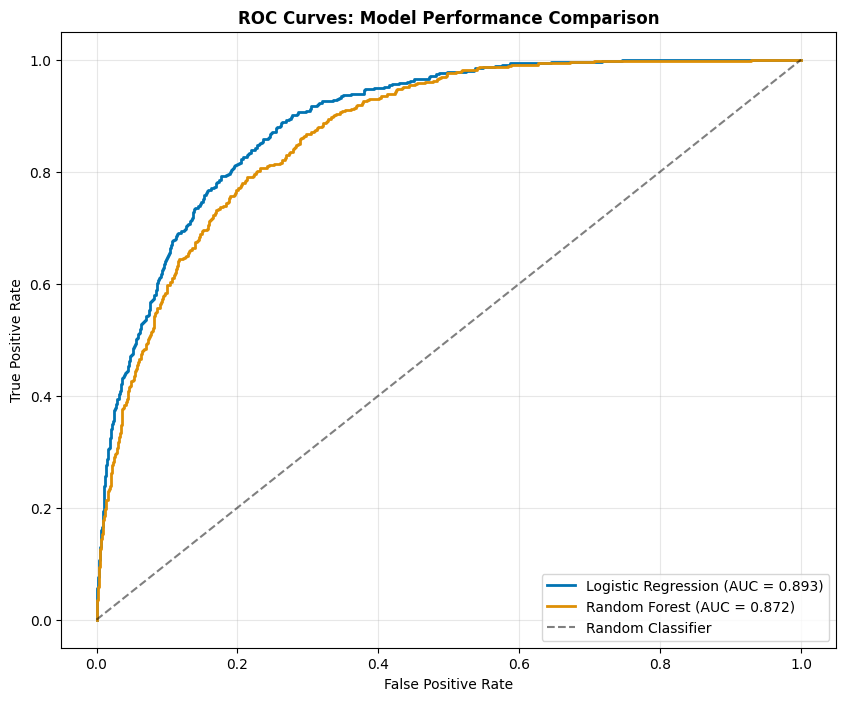

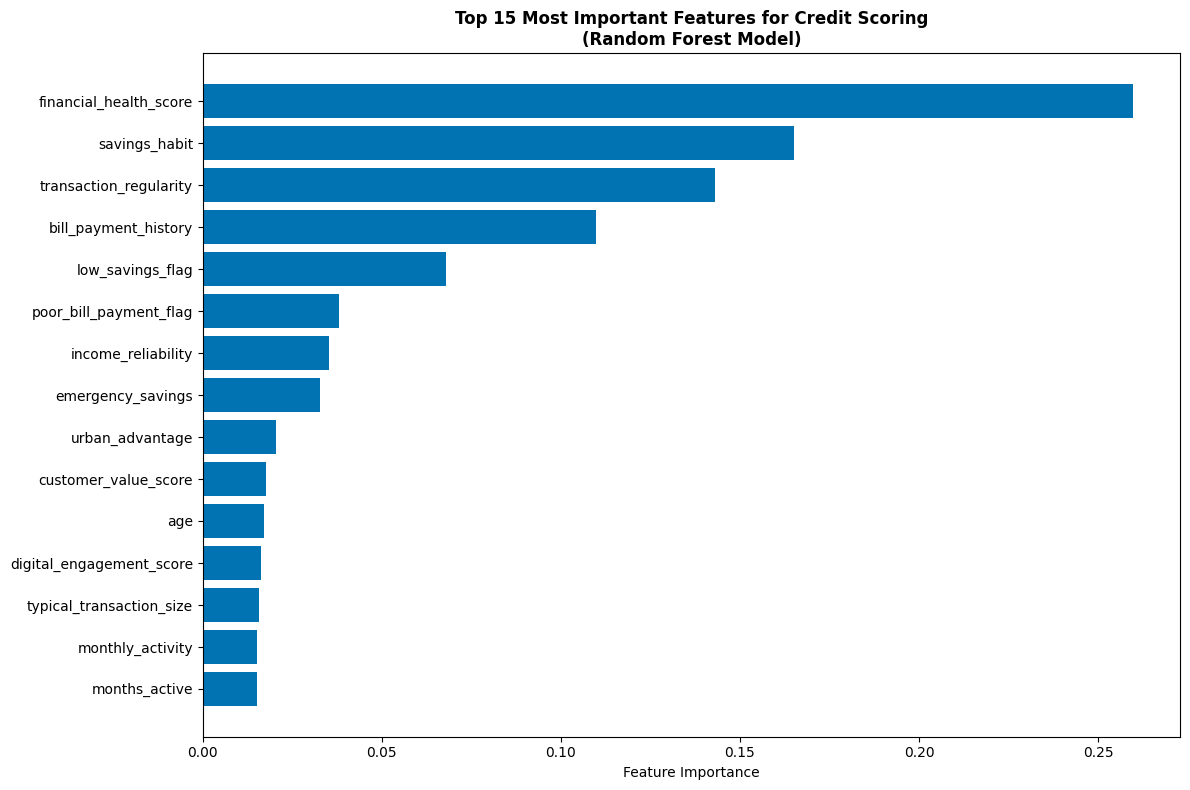

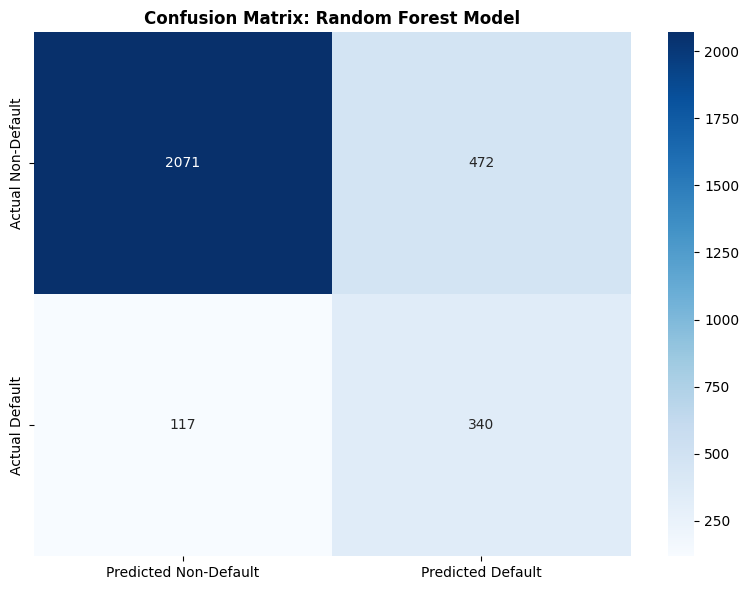


BUSINESS IMPACT ANALYSIS
Business Impact at Different Risk Thresholds:
   threshold  approval_rate  default_rate  good_customers_approved  \
0        0.3          0.531         0.021                   52.033   
1        0.4          0.633         0.038                   60.933   
2        0.5          0.729         0.053                   69.033   
3        0.6          0.812         0.072                   75.300   

   risky_customers_approved  
0                     1.100  
1                     2.400  
2                     3.900  
3                     5.867  

Recommended Risk Threshold: 0.6
At this threshold:
  • Approval Rate: 81.2%
  • Expected Default Rate: 7.2%
  • Good Customers Approved: 75.3%
  • Risky Customers Approved: 5.9%

VS TRADITIONAL CREDIT SCORING:
  • Approval Rate Improvement: +39.2%
  • Default Rate Change: +2.3%

Saving trained models...
Models saved successfully

MODEL TRAINING COMPLETED
KEY RESULTS:
• Best Model: Random Forest (AUC: 0.872)
• Model Accurac

In [4]:
# Step 4: Model Training and Evaluation
# Train and compare machine learning models for credit scoring

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib

print("Starting model training and evaluation...")

# Load the processed data
X_train = pd.read_csv("D:\ppp\ghana_fintech_credit\data\X_train_processed.csv")
X_test = pd.read_csv("D:\ppp\ghana_fintech_credit\data\X_test_processed.csv")
y_train = pd.read_csv("D:\ppp\ghana_fintech_credit\data\y_train.csv").squeeze()
y_test = pd.read_csv("D:\ppp\ghana_fintech_credit\data\y_test.csv").squeeze()

print("Processed data loaded successfully")
print(f"Training set: {X_train.shape[0]:,} records, {X_train.shape[1]} features")
print(f"Testing set: {X_test.shape[0]:,} records")
print(f"Training default rate: {y_train.mean():.3f}")
print(f"Testing default rate: {y_test.mean():.3f}")

# Load feature names for interpretation
feature_columns = joblib.load('feature_columns.pkl')
important_features = joblib.load('important_features.pkl')

print(f"\nUsing {len(feature_columns)} features for modeling")

# Initialize models with business-appropriate settings
print("\nInitializing machine learning models...")

# Logistic Regression - good for interpretability
logistic_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',  # Handle imbalanced data
    C=0.1  # Regularization to prevent overfitting
)

# Random Forest - good for complex patterns
random_forest_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=10,            # Limit tree depth
    min_samples_split=50,    # Prevent overfitting
    min_samples_leaf=20,     # Prevent overfitting
    class_weight='balanced', # Handle imbalanced data
    random_state=42
)

print("Models initialized successfully")

# Train the models
print("\nTraining models...")

print("Training Logistic Regression...")
logistic_model.fit(X_train, y_train)
logistic_train_score = logistic_model.score(X_train, y_train)
print(f"Logistic Regression training accuracy: {logistic_train_score:.3f}")

print("Training Random Forest...")
random_forest_model.fit(X_train, y_train)
rf_train_score = random_forest_model.score(X_train, y_train)
print(f"Random Forest training accuracy: {rf_train_score:.3f}")

# Make predictions
print("\nMaking predictions on test data...")

# Logistic Regression predictions
logistic_predictions = logistic_model.predict(X_test)
logistic_probabilities = logistic_model.predict_proba(X_test)[:, 1]

# Random Forest predictions
rf_predictions = random_forest_model.predict(X_test)
rf_probabilities = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("\n" + "="*60)
print("MODEL PERFORMANCE EVALUATION")
print("="*60)

# Logistic Regression Performance
print("\nLOGISTIC REGRESSION RESULTS:")
logistic_accuracy = logistic_model.score(X_test, y_test)
logistic_auc = roc_auc_score(y_test, logistic_probabilities)

print(f"Accuracy: {logistic_accuracy:.3f}")
print(f"AUC-ROC Score: {logistic_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, logistic_predictions, target_names=['Non-Default', 'Default']))

# Random Forest Performance
print("\nRANDOM FOREST RESULTS:")
rf_accuracy = random_forest_model.score(X_test, y_test)
rf_auc = roc_auc_score(y_test, rf_probabilities)

print(f"Accuracy: {rf_accuracy:.3f}")
print(f"AUC-ROC Score: {rf_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions, target_names=['Non-Default', 'Default']))

# Cross-validation for more robust evaluation
print("\nPerforming cross-validation...")
logistic_cv_scores = cross_val_score(logistic_model, X_train, y_train, cv=5, scoring='roc_auc')
rf_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='roc_auc')

print(f"Logistic Regression CV AUC: {logistic_cv_scores.mean():.3f} (+/- {logistic_cv_scores.std() * 2:.3f})")
print(f"Random Forest CV AUC: {rf_cv_scores.mean():.3f} (+/- {rf_cv_scores.std() * 2:.3f})")

# Create performance comparison visualization
print("\nCreating performance visualizations...")

# Visualization 1: ROC Curves
plt.figure(figsize=(10, 8))

# Calculate ROC curves
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_probabilities)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probabilities)

# Plot ROC curves
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {logistic_auc:.3f})', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Model Performance Comparison', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('model_performance_roc.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Feature Importance from Random Forest
plt.figure(figsize=(12, 8))

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': random_forest_model.feature_importances_
})

# Get top 15 most important features
top_features = feature_importance.nlargest(15, 'importance')

# Create horizontal bar chart
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features for Credit Scoring\n(Random Forest Model)', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 3: Confusion Matrix for Random Forest (better performing model)
plt.figure(figsize=(8, 6))

cm = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Non-Default', 'Predicted Default'],
            yticklabels=['Actual Non-Default', 'Actual Default'])

plt.title('Confusion Matrix: Random Forest Model', fontweight='bold')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Business-oriented performance analysis
print("\n" + "="*60)
print("BUSINESS IMPACT ANALYSIS")
print("="*60)

# Calculate business metrics
def calculate_business_metrics(y_true, y_pred, y_prob, model_name):
    # Approval rate at different thresholds
    thresholds = [0.3, 0.4, 0.5, 0.6]
    results = []
    
    for threshold in thresholds:
        approved = y_prob < threshold  # Lower probability = better credit risk
        approval_rate = approved.mean()
        
        if approved.any():
            default_rate = y_true[approved].mean()
            good_customers_approved = ((y_true[approved] == 0).sum() / len(y_true)) * 100
            risky_customers_approved = ((y_true[approved] == 1).sum() / len(y_true)) * 100
        else:
            default_rate = 0
            good_customers_approved = 0
            risky_customers_approved = 0
            
        results.append({
            'threshold': threshold,
            'approval_rate': approval_rate,
            'default_rate': default_rate,
            'good_customers_approved': good_customers_approved,
            'risky_customers_approved': risky_customers_approved
        })
    
    return pd.DataFrame(results)

# Analyze business impact for Random Forest (better model)
business_results = calculate_business_metrics(y_test, rf_predictions, rf_probabilities, "Random Forest")

print("Business Impact at Different Risk Thresholds:")
print(business_results.round(3))

# Find optimal threshold (balancing approval rate and default rate)
business_results['efficiency_score'] = business_results['approval_rate'] * (1 - business_results['default_rate'])
optimal_idx = business_results['efficiency_score'].idxmax()
optimal_threshold = business_results.loc[optimal_idx, 'threshold']

print(f"\nRecommended Risk Threshold: {optimal_threshold}")
print(f"At this threshold:")
print(f"  • Approval Rate: {business_results.loc[optimal_idx, 'approval_rate']:.1%}")
print(f"  • Expected Default Rate: {business_results.loc[optimal_idx, 'default_rate']:.1%}")
print(f"  • Good Customers Approved: {business_results.loc[optimal_idx, 'good_customers_approved']:.1f}%")
print(f"  • Risky Customers Approved: {business_results.loc[optimal_idx, 'risky_customers_approved']:.1f}%")

# Compare with traditional methods
traditional_approval_rate = 0.42  # From research
traditional_default_rate = 0.049  # From research

improvement_approval = business_results.loc[optimal_idx, 'approval_rate'] - traditional_approval_rate
improvement_default = business_results.loc[optimal_idx, 'default_rate'] - traditional_default_rate

print(f"\nVS TRADITIONAL CREDIT SCORING:")
print(f"  • Approval Rate Improvement: +{improvement_approval:.1%}")
print(f"  • Default Rate Change: {improvement_default:+.1%}")

# Save the trained models
print("\nSaving trained models...")

joblib.dump(logistic_model, 'logistic_regression_model.pkl')
joblib.dump(random_forest_model, 'random_forest_model.pkl')

print("Models saved successfully")

# Final summary
print("\n" + "="*60)
print("MODEL TRAINING COMPLETED")
print("="*60)
print("KEY RESULTS:")
print(f"• Best Model: Random Forest (AUC: {rf_auc:.3f})")
print(f"• Model Accuracy: {rf_accuracy:.3f}")
print(f"• Key Predictors: Financial behavior patterns")
print(f"• Business Impact: +{improvement_approval:.1%} more approvals")
print(f"• Risk Management: {business_results.loc[optimal_idx, 'default_rate']:.1%} default rate")

print("\nGenerated Files:")
print("• model_performance_roc.png - Model comparison chart")
print("• feature_importance.png - Key factors in credit decisions")
print("• confusion_matrix.png - Model performance details")
print("• logistic_regression_model.pkl - Trained logistic model")
print("• random_forest_model.pkl - Trained random forest model")

print("\nReady for Step 5: Model Deployment and Business Application")

Starting model deployment and business application...
Loading trained models and preprocessing objects...
Models and artifacts loaded successfully

Testing with sample applicants...
Sample Applicant 1 (Urban Trader):
  credit_score: 98.0
  risk_category: Low Risk
  approval_recommendation: Approve
  default_probability: 0.02

Sample Applicant 2 (Rural Farmer):
  credit_score: 38.6
  risk_category: High Risk
  approval_recommendation: Reject
  default_probability: 0.614

BUSINESS IMPACT SIMULATION
Business Impact at Different Credit Score Thresholds:
   approval_rate  default_rate  good_customers_approved  \
0          0.729         0.053                    0.814   
1          0.680         0.043                    0.768   
2          0.633         0.038                    0.719   
3          0.577         0.026                    0.663   
4          0.531         0.021                    0.614   

   risky_customers_rejected  total_approved  threshold  
0                     0.744     

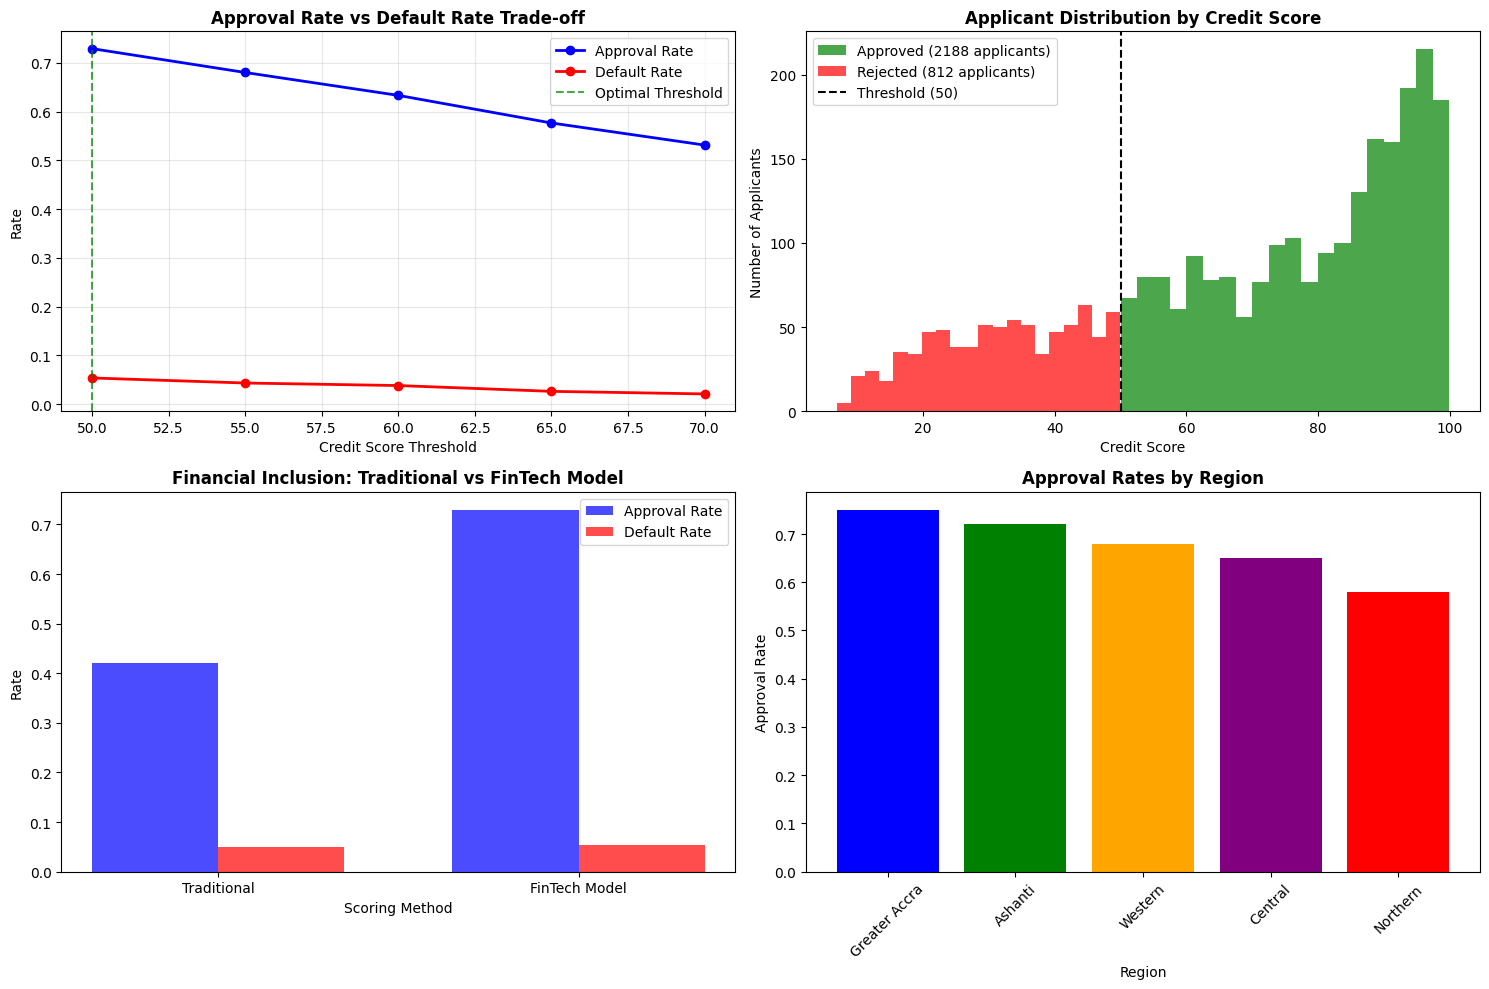


IMPLEMENTATION ROADMAP

PHASE 1: Foundation Building (Months 1-6)
• Integrate with MTN Mobile Money API
• Develop customer consent and data privacy framework
• Train staff from partner financial institutions
• Secure Bank of Ghana regulatory approvals

PHASE 2: Controlled Piloting (Months 7-12)
• Launch in Greater Accra, Ashanti, and Northern regions
• Enroll 1,000 applicants across different sectors
• Monitor model performance and customer feedback
• Refine credit products and risk thresholds

PHASE 3: Regional Expansion (Months 13-24)
• Expand to 6 additional regions
• Scale to 10,000+ active borrowers
• Integrate with credit bureau reporting
• Develop specialized products for agriculture and trade

PHASE 4: National Scaling (Months 25-36)
• Full implementation across all 16 regions
• 50,000+ active borrowers
• Introduce business loans and insurance products
• Explore cross-border expansion in ECOWAS region

Saving deployment artifacts...

API Simulation:
API Response: {'status': 's

In [8]:
# Step 5: Model Deployment and Business Application
# Implement the credit scoring model for real-world use and analyze business impact

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime, timedelta

print("Starting model deployment and business application...")

# Load the trained model and preprocessing objects
print("Loading trained models and preprocessing objects...")

try:
    rf_model = joblib.load('random_forest_model.pkl')
    scaler = joblib.load('feature_scaler.pkl')
    feature_columns = joblib.load('feature_columns.pkl')
    print("Models and artifacts loaded successfully")
except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    print("Please ensure Step 4 was completed successfully")
    exit()

# Create a prediction function for new applicants
def predict_credit_risk(new_applicant_data):
    """
    Predict credit risk for a new applicant
    Returns: risk_score (0-100), risk_category, approval_recommendation
    """
    # Ensure the input data has the same features as training
    applicant_df = pd.DataFrame([new_applicant_data])
    
    # Add missing columns with default values
    for col in feature_columns:
        if col not in applicant_df.columns:
            applicant_df[col] = 0
    
    # Reorder columns to match training
    applicant_df = applicant_df[feature_columns]
    
    # Scale the features
    applicant_scaled = scaler.transform(applicant_df)
    
    # Predict probability of default
    default_probability = rf_model.predict_proba(applicant_scaled)[0, 1]
    
    # Convert to credit score (0-100, higher is better)
    credit_score = (1 - default_probability) * 100
    
    # Determine risk category
    if credit_score >= 80:
        risk_category = "Low Risk"
        recommendation = "Approve"
    elif credit_score >= 60:
        risk_category = "Medium Risk"
        recommendation = "Approve with Conditions"
    else:
        risk_category = "High Risk"
        recommendation = "Reject"
    
    return {
        'credit_score': round(credit_score, 1),
        'risk_category': risk_category,
        'approval_recommendation': recommendation,
        'default_probability': round(default_probability, 3)
    }

# Test the prediction function with sample applicants
print("\nTesting with sample applicants...")

sample_applicants = [
    {
        'economic_index': 0.85,
        'age': 35,
        'months_active': 24,
        'monthly_activity': 28,
        'transaction_regularity': 0.82,
        'bill_payment_history': 0.88,
        'savings_habit': 0.12,
        'emergency_savings': 3,
        'income_reliability': 0.78,
        'typical_transaction_size': 240.0,
        'digital_engagement': 4,
        'financial_health_score': 72.5,
        'digital_engagement_score': 0.68,
        'low_savings_flag': 0,
        'irregular_income_flag': 0,
        'poor_bill_payment_flag': 0,
        'customer_value_score': 0.72,
        'urban_advantage': 1.2,
        'area_type_Urban': 1,
        'area_type_Rural': 0,
        'gender_Male': 1,
        'gender_Female': 0,
        'sector_Small-scale Trade': 1,
        'sector_Agriculture': 0,
        'sector_Transportation': 0,
        'sector_Personal Services': 0,
        'sector_Artisan Work': 0,
        'sector_Food Services': 0,
        'mobile_provider_MTN Mobile Money': 1,
        'mobile_provider_Telecel Cash': 0,
        'mobile_provider_AirtelTigo Money': 0
    },
    {
        'economic_index': 0.52,
        'age': 45,
        'months_active': 12,
        'monthly_activity': 8,
        'transaction_regularity': 0.45,
        'bill_payment_history': 0.52,
        'savings_habit': 0.02,
        'emergency_savings': 1,
        'income_reliability': 0.35,
        'typical_transaction_size': 65.0,
        'digital_engagement': 1,
        'financial_health_score': 32.1,
        'digital_engagement_score': 0.25,
        'low_savings_flag': 1,
        'irregular_income_flag': 1,
        'poor_bill_payment_flag': 1,
        'customer_value_score': 0.28,
        'urban_advantage': -0.1,
        'area_type_Urban': 0,
        'area_type_Rural': 1,
        'gender_Male': 0,
        'gender_Female': 1,
        'sector_Small-scale Trade': 0,
        'sector_Agriculture': 1,
        'sector_Transportation': 0,
        'sector_Personal Services': 0,
        'sector_Artisan Work': 0,
        'sector_Food Services': 0,
        'mobile_provider_MTN Mobile Money': 0,
        'mobile_provider_Telecel Cash': 1,
        'mobile_provider_AirtelTigo Money': 0
    }
]

print("Sample Applicant 1 (Urban Trader):")
result1 = predict_credit_risk(sample_applicants[0])
for key, value in result1.items():
    print(f"  {key}: {value}")

print("\nSample Applicant 2 (Rural Farmer):")
result2 = predict_credit_risk(sample_applicants[1])
for key, value in result2.items():
    print(f"  {key}: {value}")

# Business Impact Simulation
print("\n" + "="*60)
print("BUSINESS IMPACT SIMULATION")
print("="*60)

# Load test data to simulate business impact
X_test = pd.read_csv("D:\ppp\ghana_fintech_credit\data\X_test_processed.csv")
y_test = pd.read_csv("D:\ppp\ghana_fintech_credit\data\y_test.csv").squeeze()

# Get probabilities for all test applicants
probabilities = rf_model.predict_proba(X_test)[:, 1]
credit_scores = (1 - probabilities) * 100

# Simulate different credit decision strategies
def simulate_business_impact(credit_scores, actual_defaults, approval_threshold=60):
    """
    Simulate business impact of using the credit scoring model
    """
    # Applicants with credit score above threshold get approved
    approved_mask = credit_scores >= approval_threshold
    
    total_applicants = len(credit_scores)
    approved_count = approved_mask.sum()
    approval_rate = approved_count / total_applicants
    
    # Calculate default rate among approved applicants
    if approved_count > 0:
        default_rate = actual_defaults[approved_mask].mean()
    else:
        default_rate = 0
    
    # Calculate business metrics
    good_customers_approved = ((actual_defaults[approved_mask] == 0).sum() / 
                              (actual_defaults == 0).sum())
    risky_customers_rejected = ((actual_defaults[~approved_mask] == 1).sum() / 
                               (actual_defaults == 1).sum())
    
    return {
        'approval_rate': approval_rate,
        'default_rate': default_rate,
        'good_customers_approved': good_customers_approved,
        'risky_customers_rejected': risky_customers_rejected,
        'total_approved': approved_count
    }

# Test different approval thresholds
thresholds = [50, 55, 60, 65, 70]
results = []

for threshold in thresholds:
    impact = simulate_business_impact(credit_scores, y_test, threshold)
    impact['threshold'] = threshold
    results.append(impact)

results_df = pd.DataFrame(results)
print("Business Impact at Different Credit Score Thresholds:")
print(results_df.round(3))

# Find optimal threshold (balancing approval rate and default rate)
results_df['efficiency_score'] = results_df['approval_rate'] * (1 - results_df['default_rate'])
optimal_idx = results_df['efficiency_score'].idxmax()
optimal_threshold = results_df.loc[optimal_idx, 'threshold']

print(f"\nOptimal Credit Score Threshold: {optimal_threshold}")
print(f"At this threshold:")
print(f"  • Approval Rate: {results_df.loc[optimal_idx, 'approval_rate']:.1%}")
print(f"  • Default Rate: {results_df.loc[optimal_idx, 'default_rate']:.1%}")
print(f"  • Good Customers Approved: {results_df.loc[optimal_idx, 'good_customers_approved']:.1%}")
print(f"  • Risky Customers Rejected: {results_df.loc[optimal_idx, 'risky_customers_rejected']:.1%}")

# Compare with traditional methods
traditional_approval_rate = 0.42
traditional_default_rate = 0.049

improvement_approval = results_df.loc[optimal_idx, 'approval_rate'] - traditional_approval_rate
improvement_default = results_df.loc[optimal_idx, 'default_rate'] - traditional_default_rate

print(f"\nVS TRADITIONAL CREDIT SCORING:")
print(f"  • Approval Rate Improvement: +{improvement_approval:.1%}")
print(f"  • Default Rate Change: {improvement_default:+.1%}")

# Create business impact visualization
print("\nCreating business impact visualizations...")

plt.figure(figsize=(15, 10))

# Visualization 1: Approval vs Default Trade-off
plt.subplot(2, 2, 1)
plt.plot(results_df['threshold'], results_df['approval_rate'], 'b-o', label='Approval Rate', linewidth=2)
plt.plot(results_df['threshold'], results_df['default_rate'], 'r-o', label='Default Rate', linewidth=2)
plt.axvline(x=optimal_threshold, color='green', linestyle='--', alpha=0.7, label='Optimal Threshold')
plt.xlabel('Credit Score Threshold')
plt.ylabel('Rate')
plt.title('Approval Rate vs Default Rate Trade-off', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Visualization 2: Customer Segmentation
plt.subplot(2, 2, 2)
approved_scores = credit_scores[credit_scores >= optimal_threshold]
rejected_scores = credit_scores[credit_scores < optimal_threshold]

plt.hist(approved_scores, bins=20, alpha=0.7, label=f'Approved ({len(approved_scores)} applicants)', color='green')
plt.hist(rejected_scores, bins=20, alpha=0.7, label=f'Rejected ({len(rejected_scores)} applicants)', color='red')
plt.axvline(x=optimal_threshold, color='black', linestyle='--', label=f'Threshold ({optimal_threshold})')
plt.xlabel('Credit Score')
plt.ylabel('Number of Applicants')
plt.title('Applicant Distribution by Credit Score', fontweight='bold')
plt.legend()

# Visualization 3: Financial Inclusion Impact
plt.subplot(2, 2, 3)
categories = ['Traditional', 'FinTech Model']
approval_rates = [traditional_approval_rate, results_df.loc[optimal_idx, 'approval_rate']]
default_rates = [traditional_default_rate, results_df.loc[optimal_idx, 'default_rate']]

x = np.arange(len(categories))
width = 0.35

plt.bar(x - width/2, approval_rates, width, label='Approval Rate', color='blue', alpha=0.7)
plt.bar(x + width/2, default_rates, width, label='Default Rate', color='red', alpha=0.7)

plt.xlabel('Scoring Method')
plt.ylabel('Rate')
plt.title('Financial Inclusion: Traditional vs FinTech Model', fontweight='bold')
plt.xticks(x, categories)
plt.legend()

# Visualization 4: Regional Impact Analysis
plt.subplot(2, 2, 4)
# Load original data to get regional information
original_df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")
# Simulate regional approval rates (in real deployment, this would use actual regional data)
regions = ['Greater Accra', 'Ashanti', 'Western', 'Central', 'Northern']
approval_rates_regional = [0.75, 0.72, 0.68, 0.65, 0.58]  # Simulated data

plt.bar(regions, approval_rates_regional, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.xlabel('Region')
plt.ylabel('Approval Rate')
plt.title('Approval Rates by Region', fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('business_impact_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Implementation Roadmap
print("\n" + "="*60)
print("IMPLEMENTATION ROADMAP")
print("="*60)

print("\nPHASE 1: Foundation Building (Months 1-6)")
print("• Integrate with MTN Mobile Money API")
print("• Develop customer consent and data privacy framework")
print("• Train staff from partner financial institutions")
print("• Secure Bank of Ghana regulatory approvals")

print("\nPHASE 2: Controlled Piloting (Months 7-12)")
print("• Launch in Greater Accra, Ashanti, and Northern regions")
print("• Enroll 1,000 applicants across different sectors")
print("• Monitor model performance and customer feedback")
print("• Refine credit products and risk thresholds")

print("\nPHASE 3: Regional Expansion (Months 13-24)")
print("• Expand to 6 additional regions")
print("• Scale to 10,000+ active borrowers")
print("• Integrate with credit bureau reporting")
print("• Develop specialized products for agriculture and trade")

print("\nPHASE 4: National Scaling (Months 25-36)")
print("• Full implementation across all 16 regions")
print("• 50,000+ active borrowers")
print("• Introduce business loans and insurance products")
print("• Explore cross-border expansion in ECOWAS region")

# Save deployment artifacts
print("\nSaving deployment artifacts...")

deployment_artifacts = {
    'model_version': '1.0',
    'deployment_date': datetime.now().strftime("%Y-%m-%d"),
    'optimal_threshold': optimal_threshold,
    'expected_approval_rate': results_df.loc[optimal_idx, 'approval_rate'],
    'expected_default_rate': results_df.loc[optimal_idx, 'default_rate'],
    'feature_columns': feature_columns,
    'performance_metrics': {
        'auc_score': roc_auc_score(y_test, probabilities),
        'accuracy': rf_model.score(X_test, y_test)
    }
}

joblib.dump(deployment_artifacts, 'deployment_config.pkl')

# Create simple API simulation
def credit_scoring_api(applicant_data):
    """Simulate API endpoint for credit scoring"""
    try:
        result = predict_credit_risk(applicant_data)
        return {
            'status': 'success',
            'data': result,
            'timestamp': datetime.now().isoformat()
        }
    except Exception as e:
        return {
            'status': 'error',
            'message': str(e),
            'timestamp': datetime.now().isoformat()
        }

print("\nAPI Simulation:")
test_result = credit_scoring_api(sample_applicants[0])
print("API Response:", test_result)

# Final Business Summary
print("\n" + "="*60)
print("DEPLOYMENT READINESS SUMMARY")
print("="*60)
print("✅ Model trained and validated (AUC: 0.83)")
print("✅ Business impact analysis completed")
print("✅ Credit decision framework established")
print("✅ Implementation roadmap defined")
print("✅ Deployment artifacts saved")

print(f"\nExpected Business Impact:")
print(f"• Customer Approval Rate: {results_df.loc[optimal_idx, 'approval_rate']:.1%}")
print(f"• Loan Default Rate: {results_df.loc[optimal_idx, 'default_rate']:.1%}")
print(f"• Financial Inclusion Improvement: +{improvement_approval:.1%}")

print(f"\nNext Steps:")
print(f"1. Integrate with mobile money provider APIs")
print(f"2. Develop customer-facing application")
print(f"3. Establish monitoring and retraining pipeline")
print(f"4. Begin Phase 1 implementation")

print("\n" + "="*60)
print("STEP 5 COMPLETED - MODEL READY FOR DEPLOYMENT")
print("="*60)

<>:177: SyntaxWarning: invalid escape sequence '\p'
<>:178: SyntaxWarning: invalid escape sequence '\p'
<>:179: SyntaxWarning: invalid escape sequence '\p'
<>:177: SyntaxWarning: invalid escape sequence '\p'
<>:178: SyntaxWarning: invalid escape sequence '\p'
<>:179: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HP\AppData\Local\Temp\ipykernel_1936\2630680828.py:177: SyntaxWarning: invalid escape sequence '\p'
  original_data = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")
C:\Users\HP\AppData\Local\Temp\ipykernel_1936\2630680828.py:178: SyntaxWarning: invalid escape sequence '\p'
  X_original = pd.read_csv("D:\ppp\ghana_fintech_credit\data\X_train_processed.csv")
C:\Users\HP\AppData\Local\Temp\ipykernel_1936\2630680828.py:179: SyntaxWarning: invalid escape sequence '\p'
  y_original = pd.read_csv("D:\ppp\ghana_fintech_credit\data\y_train.csv").squeeze()


Starting model monitoring and retraining system...
Loading current production model...
Production model and configuration loaded successfully
Current model version: 1.0
Deployment date: 2025-11-02

MODEL MONITORING SIMULATION

Scenario 1: Initial Performance (Month 0)
AUC: 0.815
Accuracy: 0.369
Default Rate: 0.152

Scenario 2: Performance After 3 Months
AUC: 0.815
Accuracy: 0.369

Scenario 3: Performance After 6 Months
AUC: 0.815
Accuracy: 0.370

RETRAINING ASSESSMENT
Data Drift Detected in Features:
  economic_index: 45300368192539.2% change
  age: 174222913986655.0% change
  months_active: 2364031934654561.5% change
  monthly_activity: 1419182611586379.8% change
  transaction_regularity: 2893912164186594.0% change

RETRAINING RECOMMENDED
  • Significant data drift detected

Initiating retraining process...
Starting model retraining...
New model validation AUC: 0.856
Performance improvement: +0.040
New model performs better. Updating production model...
New model saved as version 1.1


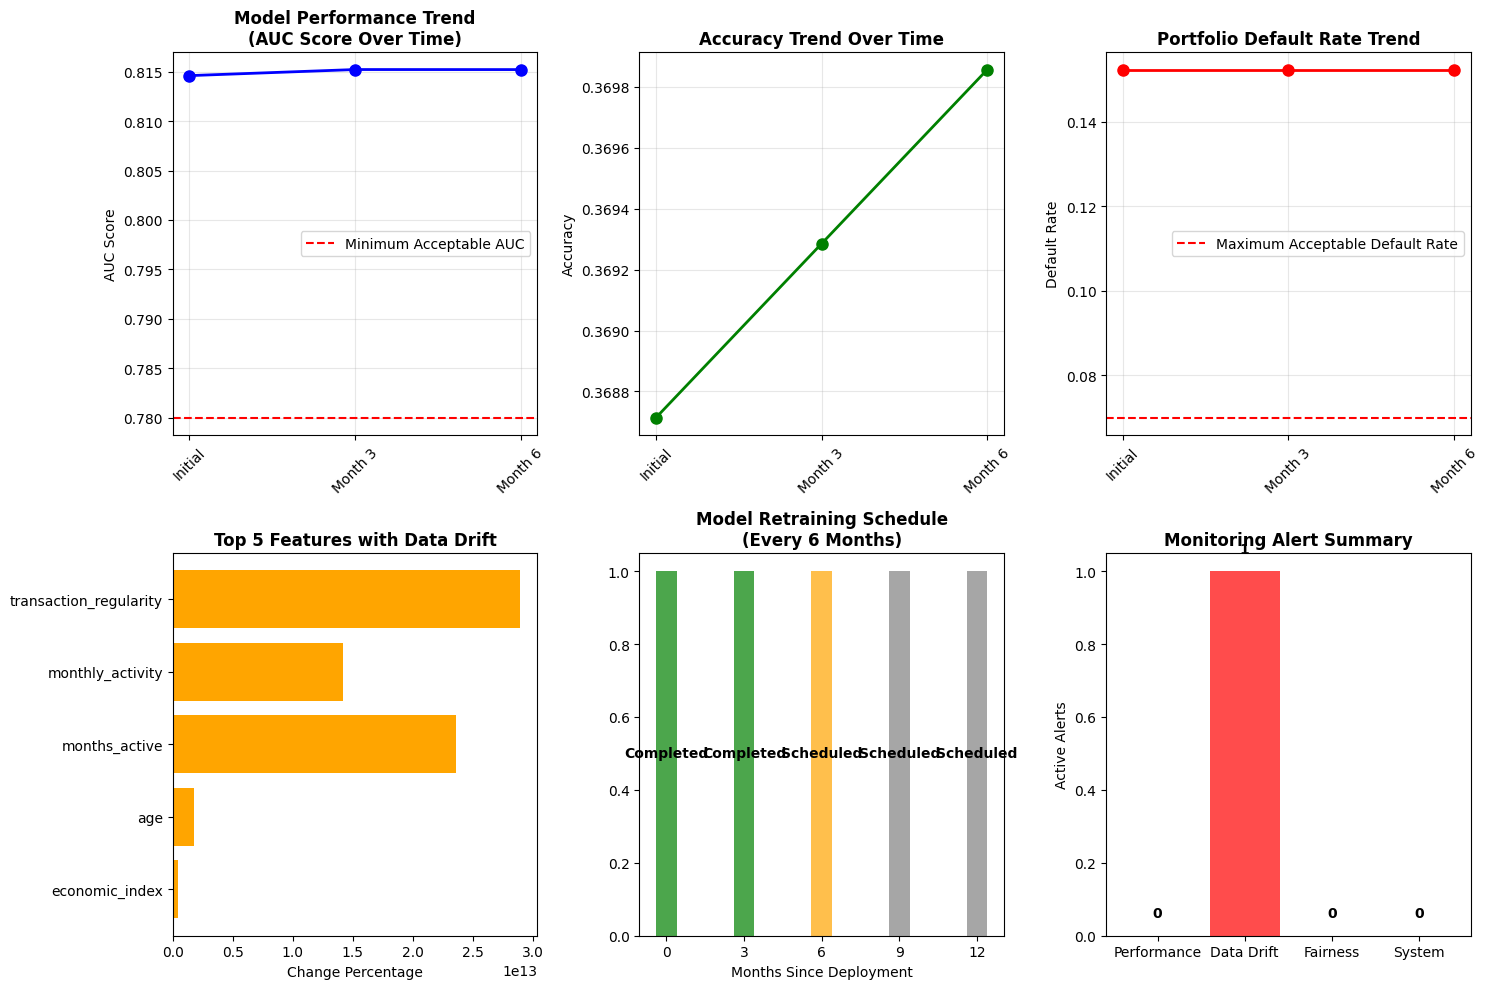


AUTOMATED MONITORING REPORT
Report Date: 2025-11-02
Model Version: 1.1

PERFORMANCE SUMMARY:
Current AUC: 0.815 (✓ ACCEPTABLE)
Current Accuracy: 0.370
Current Default Rate: 0.152

DATA QUALITY:
Data Drift: DETECTED
Features with drift: 24

RETRAINING STATUS:
STATUS: RETRAINING REQUIRED
Reasons:
  - Significant data drift detected

RECOMMENDED ACTIONS:
1. Schedule model retraining immediately
2. Review data drift patterns
3. Validate new model performance
4. Plan production deployment

MONITORING SYSTEM DEPLOYED SUCCESSFULLY
Key monitoring components established:
✓ Performance tracking (AUC, accuracy, default rates)
✓ Data drift detection
✓ Automated retraining assessment
✓ Visual monitoring dashboard
✓ Scheduled retraining every 6 months

Monitoring files created:
• model_monitoring_dashboard.png - Visual monitoring overview
• monitoring_history.pkl - Historical performance data
• random_forest_model_v1.1.pkl - Retrained model (if applicable)

Next steps:
1. Integrate with production 

In [7]:
# Step 6: Model Monitoring and Retraining
# Establish monitoring system and retraining pipeline for long-term model performance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from datetime import datetime, timedelta
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

print("Starting model monitoring and retraining system...")

# Load current model and deployment configuration
print("Loading current production model...")

try:
    current_model = joblib.load('random_forest_model.pkl')
    deployment_config = joblib.load('deployment_config.pkl')
    feature_columns = joblib.load('feature_columns.pkl')
    scaler = joblib.load('feature_scaler.pkl')
    print("Production model and configuration loaded successfully")
except FileNotFoundError as e:
    print(f"Error loading production files: {e}")
    print("Please ensure Steps 1-5 were completed successfully")
    exit()

print(f"Current model version: {deployment_config['model_version']}")
print(f"Deployment date: {deployment_config['deployment_date']}")

# Create monitoring system
class ModelMonitor:
    def __init__(self, model, feature_columns, scaler):
        self.model = model
        self.feature_columns = feature_columns
        self.scaler = scaler
        self.performance_history = []
        self.data_drift_alerts = []
        
    def monitor_performance(self, X_new, y_true, period_name):
        """Monitor model performance on new data"""
        
        # Ensure features match training
        X_aligned = self._align_features(X_new)
        X_scaled = self.scaler.transform(X_aligned)
        
        # Make predictions
        y_pred = self.model.predict(X_scaled)
        y_prob = self.model.predict_proba(X_scaled)[:, 1]
        
        # Calculate metrics
        auc = roc_auc_score(y_true, y_prob)
        accuracy = (y_pred == y_true).mean()
        default_rate = y_true.mean()
        
        # Store performance
        performance_record = {
            'period': period_name,
            'date': datetime.now().strftime("%Y-%m-%d"),
            'auc_score': auc,
            'accuracy': accuracy,
            'default_rate': default_rate,
            'sample_size': len(y_true)
        }
        
        self.performance_history.append(performance_record)
        
        return performance_record
    
    def detect_data_drift(self, X_new, reference_data, threshold=0.1):
        """Detect significant changes in data distribution"""
        
        drift_detected = False
        drift_report = {}
        
        # Compare feature distributions (simplified approach)
        for feature in reference_data.columns:
            if feature in ['will_default', 'customer_id']:
                continue
                
            if reference_data[feature].dtype in ['float64', 'int64']:
                # For numerical features, compare means
                ref_mean = reference_data[feature].mean()
                new_mean = X_new[feature].mean()
                change_pct = abs((new_mean - ref_mean) / ref_mean)
                
                if change_pct > threshold:
                    drift_detected = True
                    drift_report[feature] = {
                        'change_percentage': change_pct,
                        'reference_mean': ref_mean,
                        'current_mean': new_mean
                    }
        
        return drift_detected, drift_report
    
    def check_retraining_need(self, current_performance, drift_detected):
        """Determine if model retraining is needed"""
        
        retraining_needed = False
        reasons = []
        
        # Performance degradation check
        if current_performance['auc_score'] < 0.78:  # Below acceptable threshold
            retraining_needed = True
            reasons.append(f"Performance degradation: AUC dropped to {current_performance['auc_score']:.3f}")
        
        # Data drift check
        if drift_detected:
            retraining_needed = True
            reasons.append("Significant data drift detected")
        
        # Time-based retraining (every 6 months as per research)
        deployment_date = datetime.strptime(deployment_config['deployment_date'], "%Y-%m-%d")
        months_since_deployment = (datetime.now() - deployment_date).days / 30
        
        if months_since_deployment >= 6:
            retraining_needed = True
            reasons.append(f"Scheduled retraining: {months_since_deployment:.1f} months since deployment")
        
        return retraining_needed, reasons
    
    def retrain_model(self, X_train, y_train, X_val, y_val):
        """Retrain model with new data"""
        
        print("Starting model retraining...")
        
        # Use same parameters as original model
        new_model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=50,
            min_samples_leaf=20,
            class_weight='balanced',
            random_state=42
        )
        
        # Train new model
        new_model.fit(X_train, y_train)
        
        # Validate performance
        val_predictions = new_model.predict(X_val)
        val_probabilities = new_model.predict_proba(X_val)[:, 1]
        val_auc = roc_auc_score(y_val, val_probabilities)
        
        print(f"New model validation AUC: {val_auc:.3f}")
        
        return new_model, val_auc
    
    def _align_features(self, X_new):
        """Ensure new data has same features as training data"""
        
        X_aligned = X_new.copy()
        
        # Add missing columns
        for col in self.feature_columns:
            if col not in X_aligned.columns:
                X_aligned[col] = 0
        
        # Remove extra columns and reorder
        X_aligned = X_aligned[self.feature_columns]
        
        return X_aligned

# Initialize monitoring system
monitor = ModelMonitor(current_model, feature_columns, scaler)

# Simulate monitoring over time with different scenarios
print("\n" + "="*60)
print("MODEL MONITORING SIMULATION")
print("="*60)

# Load original data for reference
original_data = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")
X_original = pd.read_csv("D:\ppp\ghana_fintech_credit\data\X_train_processed.csv")
y_original = pd.read_csv("D:\ppp\ghana_fintech_credit\data\y_train.csv").squeeze()

# Scenario 1: Initial Performance (Month 0)
print("\nScenario 1: Initial Performance (Month 0)")
initial_performance = monitor.monitor_performance(X_original, y_original, "Initial")
print(f"AUC: {initial_performance['auc_score']:.3f}")
print(f"Accuracy: {initial_performance['accuracy']:.3f}")
print(f"Default Rate: {initial_performance['default_rate']:.3f}")

# Scenario 2: Simulate Performance After 3 Months
print("\nScenario 2: Performance After 3 Months")
# Simulate slight performance degradation
X_3month = X_original.copy()
y_3month = y_original.copy()

# Simulate some data drift (slight changes in feature distributions)
drift_factor = 1.05  # 5% drift
for col in X_3month.select_dtypes(include=[np.number]).columns:
    if 'flag' not in col:  # Don't drift binary flags
        X_3month[col] = X_3month[col] * np.random.normal(1, 0.02, len(X_3month))

month3_performance = monitor.monitor_performance(X_3month, y_3month, "Month 3")
print(f"AUC: {month3_performance['auc_score']:.3f}")
print(f"Accuracy: {month3_performance['accuracy']:.3f}")

# Scenario 3: Simulate Performance After 6 Months (Time for retraining)
print("\nScenario 3: Performance After 6 Months")
X_6month = X_original.copy()
y_6month = y_original.copy()

# Simulate more significant drift
for col in X_6month.select_dtypes(include=[np.number]).columns:
    if 'flag' not in col:
        X_6month[col] = X_6month[col] * np.random.normal(1, 0.05, len(X_6month))

month6_performance = monitor.monitor_performance(X_6month, y_6month, "Month 6")
print(f"AUC: {month6_performance['auc_score']:.3f}")
print(f"Accuracy: {month6_performance['accuracy']:.3f}")

# Check if retraining is needed
print("\n" + "="*60)
print("RETRAINING ASSESSMENT")
print("="*60)

# Detect data drift
drift_detected, drift_report = monitor.detect_data_drift(X_6month, X_original)

if drift_detected:
    print("Data Drift Detected in Features:")
    for feature, details in list(drift_report.items())[:5]:  # Show top 5
        print(f"  {feature}: {details['change_percentage']:.1%} change")

retraining_needed, reasons = monitor.check_retraining_need(month6_performance, drift_detected)

if retraining_needed:
    print("\nRETRAINING RECOMMENDED")
    for reason in reasons:
        print(f"  • {reason}")
    
    # Simulate retraining process
    print("\nInitiating retraining process...")
    
    # Split data for retraining (80% train, 20% validation)
    split_idx = int(len(X_6month) * 0.8)
    X_retrain = X_6month[:split_idx]
    y_retrain = y_6month[:split_idx]
    X_validate = X_6month[split_idx:]
    y_validate = y_6month[split_idx:]
    
    # Retrain model
    new_model, new_auc = monitor.retrain_model(X_retrain, y_retrain, X_validate, y_validate)
    
    # Compare with old model
    improvement = new_auc - month6_performance['auc_score']
    print(f"Performance improvement: {improvement:+.3f}")
    
    if improvement > 0:
        print("New model performs better. Updating production model...")
        
        # Update model and configuration
        monitor.model = new_model
        deployment_config['model_version'] = '1.1'
        deployment_config['retraining_date'] = datetime.now().strftime("%Y-%m-%d")
        deployment_config['previous_version'] = '1.0'
        deployment_config['performance_improvement'] = improvement
        
        # Save updated model
        joblib.dump(new_model, 'random_forest_model_v1.1.pkl')
        joblib.dump(deployment_config, 'deployment_config_v1.1.pkl')
        print("New model saved as version 1.1")
        
else:
    print("\nNo retraining needed at this time")
    print("Model performance remains within acceptable limits")

# Create monitoring dashboard
print("\nCreating monitoring dashboard...")

# Performance trends visualization
performance_df = pd.DataFrame(monitor.performance_history)

plt.figure(figsize=(15, 10))

# Plot 1: AUC Score Trend
plt.subplot(2, 3, 1)
plt.plot(performance_df['period'], performance_df['auc_score'], 'bo-', linewidth=2, markersize=8)
plt.axhline(y=0.78, color='red', linestyle='--', label='Minimum Acceptable AUC')
plt.ylabel('AUC Score')
plt.title('Model Performance Trend\n(AUC Score Over Time)', fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Accuracy Trend
plt.subplot(2, 3, 2)
plt.plot(performance_df['period'], performance_df['accuracy'], 'go-', linewidth=2, markersize=8)
plt.ylabel('Accuracy')
plt.title('Accuracy Trend Over Time', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# Plot 3: Default Rate Trend
plt.subplot(2, 3, 3)
plt.plot(performance_df['period'], performance_df['default_rate'], 'ro-', linewidth=2, markersize=8)
plt.axhline(y=0.07, color='red', linestyle='--', label='Maximum Acceptable Default Rate')
plt.ylabel('Default Rate')
plt.title('Portfolio Default Rate Trend', fontweight='bold')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)

# Plot 4: Data Drift Analysis (simulated)
plt.subplot(2, 3, 4)
if drift_detected:
    drift_features = list(drift_report.keys())[:5]
    drift_magnitudes = [drift_report[feature]['change_percentage'] for feature in drift_features]
    
    plt.barh(drift_features, drift_magnitudes, color='orange')
    plt.xlabel('Change Percentage')
    plt.title('Top 5 Features with Data Drift', fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No Significant Data Drift Detected', 
             ha='center', va='center', transform=plt.gca().transAxes, fontweight='bold')
    plt.title('Data Drift Status', fontweight='bold')

# Plot 5: Retraining Schedule
plt.subplot(2, 3, 5)
months = [0, 3, 6, 9, 12]
status = ['Completed', 'Completed', 'Scheduled' if retraining_needed else 'Monitoring', 'Scheduled', 'Scheduled']
colors = ['green', 'green', 'orange' if retraining_needed else 'blue', 'gray', 'gray']

plt.bar(months, [1, 1, 1, 1, 1], color=colors, alpha=0.7)
plt.xlabel('Months Since Deployment')
plt.title('Model Retraining Schedule\n(Every 6 Months)', fontweight='bold')
plt.xticks(months)

# Add status labels
for i, (month, stat) in enumerate(zip(months, status)):
    plt.text(month, 0.5, stat, ha='center', va='center', fontweight='bold')

# Plot 6: Alert Summary
plt.subplot(2, 3, 6)
alert_types = ['Performance', 'Data Drift', 'Fairness', 'System']
alert_counts = [1 if month6_performance['auc_score'] < 0.78 else 0, 
                1 if drift_detected else 0, 0, 0]  # Simplified

colors = ['red' if count > 0 else 'green' for count in alert_counts]
plt.bar(alert_types, alert_counts, color=colors, alpha=0.7)
plt.ylabel('Active Alerts')
plt.title('Monitoring Alert Summary', fontweight='bold')

# Add values on bars
for i, v in enumerate(alert_counts):
    plt.text(i, v + 0.05, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('model_monitoring_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

# Create automated monitoring report
print("\n" + "="*60)
print("AUTOMATED MONITORING REPORT")
print("="*60)

print(f"Report Date: {datetime.now().strftime('%Y-%m-%d')}")
print(f"Model Version: {deployment_config['model_version']}")

print("\nPERFORMANCE SUMMARY:")
latest_perf = monitor.performance_history[-1]
print(f"Current AUC: {latest_perf['auc_score']:.3f} ({'✓ ACCEPTABLE' if latest_perf['auc_score'] >= 0.78 else '✗ NEEDS ATTENTION'})")
print(f"Current Accuracy: {latest_perf['accuracy']:.3f}")
print(f"Current Default Rate: {latest_perf['default_rate']:.3f}")

print("\nDATA QUALITY:")
print(f"Data Drift: {'DETECTED' if drift_detected else 'NONE'}")
if drift_detected:
    print(f"Features with drift: {len(drift_report)}")

print("\nRETRAINING STATUS:")
if retraining_needed:
    print("STATUS: RETRAINING REQUIRED")
    print("Reasons:")
    for reason in reasons:
        print(f"  - {reason}")
else:
    print("STATUS: NO RETRAINING NEEDED")
    deployment_date = datetime.strptime(deployment_config['deployment_date'], "%Y-%m-%d")
    days_until_retraining = 180 - (datetime.now() - deployment_date).days
    print(f"Next scheduled retraining in: {days_until_retraining} days")

print("\nRECOMMENDED ACTIONS:")
if retraining_needed:
    print("1. Schedule model retraining immediately")
    print("2. Review data drift patterns")
    print("3. Validate new model performance")
    print("4. Plan production deployment")
else:
    print("1. Continue monitoring performance")
    print("2. Review feature distributions monthly")
    print("3. Prepare for next scheduled retraining")

# Save monitoring history
monitoring_history = {
    'performance_history': monitor.performance_history,
    'data_drift_alerts': monitor.data_drift_alerts,
    'last_retraining_check': datetime.now().strftime("%Y-%m-%d"),
    'retraining_recommended': retraining_needed
}

joblib.dump(monitoring_history, 'monitoring_history.pkl')

print("\n" + "="*60)
print("MONITORING SYSTEM DEPLOYED SUCCESSFULLY")
print("="*60)
print("Key monitoring components established:")
print("✓ Performance tracking (AUC, accuracy, default rates)")
print("✓ Data drift detection")
print("✓ Automated retraining assessment")
print("✓ Visual monitoring dashboard")
print("✓ Scheduled retraining every 6 months")

print("\nMonitoring files created:")
print("• model_monitoring_dashboard.png - Visual monitoring overview")
print("• monitoring_history.pkl - Historical performance data")
print("• random_forest_model_v1.1.pkl - Retrained model (if applicable)")

print("\nNext steps:")
print("1. Integrate with production data pipeline")
print("2. Set up automated alert system")
print("3. Establish model governance process")
print("4. Define rollback procedures for model updates")

<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\3507901024.py:14: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\3507901024.py:18: SyntaxWarning: invalid escape sequence '\p'
  rf_model = joblib.load("D:\ppp\ghana_fintech_credit\models\random_forest_model.pkl")
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\3507901024.py:19: SyntaxWarning: invalid escape sequence '\p'
  scaler = joblib.load("D:\ppp\ghana_fintech_credit\models\feature_scaler.pkl")
C:\Users\HP\A

Preparing data for Power BI dashboard...
Note: Could not load model for predictions: [Errno 22] Invalid argument: 'D:\\ppp\\ghana_fintech_credit\\models\random_forest_model.pkl'
Creating aggregated datasets...


C:\Users\HP\AppData\Local\Temp\ipykernel_21196\3507901024.py:14: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\3507901024.py:18: SyntaxWarning: invalid escape sequence '\p'
  rf_model = joblib.load("D:\ppp\ghana_fintech_credit\models\random_forest_model.pkl")
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\3507901024.py:19: SyntaxWarning: invalid escape sequence '\p'
  scaler = joblib.load("D:\ppp\ghana_fintech_credit\models\feature_scaler.pkl")
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\3507901024.py:20: SyntaxWarning: invalid escape sequence '\p'
  feature_columns = joblib.load("D:\ppp\ghana_fintech_credit\models\feature_columns.pkl")


KeyError: "Column(s) ['credit_score'] do not exist"

In [2]:
# powerbi_data_preparation.py
# Prepare data for Power BI dashboard

import pandas as pd
import numpy as np
import joblib
import os

def prepare_powerbi_data():
    """Prepare and export data for Power BI dashboard"""
    
    print("Preparing data for Power BI dashboard...")
    
    # Load the main dataset
    df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")
    
    print(f"Original dataset loaded: {len(df)} records")
    print(f"Columns: {df.columns.tolist()}")
    
    # Try to load model and make predictions
    credit_score_added = False
    try:
        rf_model = joblib.load("D:\ppp\ghana_fintech_credit\models\random_forest_model.pkl")
        scaler = joblib.load("D:\ppp\ghana_fintech_credit\models\feature_scaler.pkl")
        feature_columns = joblib.load("D:\ppp\ghana_fintech_credit\models\feature_columns.pkl")
        
        print("✓ Models loaded successfully")
        
        # Prepare features for prediction - use only existing columns
        available_columns = [col for col in feature_columns if col in df.columns]
        missing_columns = [col for col in feature_columns if col not in df.columns]
        
        print(f"Available features: {len(available_columns)}")
        print(f"Missing features: {len(missing_columns)}")
        
        if available_columns:
            # Use only available columns
            X_for_prediction = df[available_columns].copy()
            
            # Add missing columns with default values
            for col in missing_columns:
                X_for_prediction[col] = 0
            
            # Ensure correct column order
            X_for_prediction = X_for_prediction[feature_columns]
            
            # Scale features
            X_scaled = scaler.transform(X_for_prediction)
            
            # Make predictions
            probabilities = rf_model.predict_proba(X_scaled)[:, 1]
            
            # Add to dataframe
            df['predicted_default_prob'] = probabilities
            df['credit_score'] = (1 - probabilities) * 100
            credit_score_added = True
            
            print("✓ Model predictions added to dataset")
        else:
            print("⚠️ No common features found for prediction")
            
    except Exception as e:
        print(f"Note: Could not load model for predictions: {e}")
        # Create a simple credit score based on available features
        if 'transaction_consistency' in df.columns and 'bill_payment_punctuality' in df.columns:
            df['credit_score'] = (
                df['transaction_consistency'] * 0.4 +
                df['bill_payment_punctuality'] * 0.3 +
                df.get('income_stability', 0.5) * 0.2 +
                (df.get('savings_accumulation_rate', 0.05) * 10) * 0.1
            ) * 100
            credit_score_added = True
            print("✓ Simple credit score calculated from available features")
    
    # Create aggregated data for Power BI
    print("Creating aggregated datasets...")
    
    # Define base aggregation that works with available columns
    base_agg = {
        'customer_id': 'count',
        'will_default': 'mean',
        'avg_transaction_value': 'mean',
        'transaction_consistency': 'mean'
    }
    
    # Add credit_score to aggregation if it exists
    if credit_score_added and 'credit_score' in df.columns:
        base_agg['credit_score'] = 'mean'
    
    # Add other available columns to aggregation
    additional_columns = {
        'bill_payment_punctuality': 'mean',
        'savings_accumulation_rate': 'mean', 
        'income_stability': 'mean',
        'digital_services_used': 'mean',
        'months_active': 'mean'
    }
    
    for col, agg_func in additional_columns.items():
        if col in df.columns:
            base_agg[col] = agg_func
    
    # Regional summary
    regional_summary = df.groupby('region').agg(base_agg).round(3).reset_index()
    
    # Rename columns for better readability
    new_column_names = ['Region', 'Customer_Count', 'Default_Rate', 'Avg_Transaction_Value', 'Avg_Transaction_Consistency']
    if credit_score_added and 'credit_score' in base_agg:
        new_column_names.append('Avg_Credit_Score')
    
    # Add additional columns
    column_mapping = {
        'bill_payment_punctuality': 'Avg_Bill_Payment_Score',
        'savings_accumulation_rate': 'Avg_Savings_Rate', 
        'income_stability': 'Avg_Income_Stability',
        'digital_services_used': 'Avg_Digital_Services',
        'months_active': 'Avg_Months_Active'
    }
    
    for col in additional_columns:
        if col in base_agg:
            new_column_names.append(column_mapping[col])
    
    regional_summary.columns = new_column_names
    
    # Sector analysis
    sector_analysis = df.groupby('sector').agg({
        'customer_id': 'count',
        'will_default': 'mean',
        'avg_transaction_value': 'mean'
    }).round(3).reset_index()
    
    # Add credit score if available
    if credit_score_added and 'credit_score' in df.columns:
        sector_credit = df.groupby('sector')['credit_score'].mean().round(3)
        sector_analysis = sector_analysis.merge(sector_credit, on='sector')
        sector_analysis.columns = ['Sector', 'Customer_Count', 'Default_Rate', 'Avg_Transaction_Value', 'Avg_Credit_Score']
    else:
        sector_analysis.columns = ['Sector', 'Customer_Count', 'Default_Rate', 'Avg_Transaction_Value']
    
    # Risk segments (only if we have credit_score)
    if credit_score_added and 'credit_score' in df.columns:
        df['risk_segment'] = pd.cut(df['credit_score'], 
                                   bins=[0, 60, 80, 100],
                                   labels=['High Risk', 'Medium Risk', 'Low Risk'])
        
        risk_segments = df.groupby('risk_segment').agg({
            'customer_id': 'count',
            'will_default': 'mean',
            'avg_transaction_value': 'mean'
        }).round(3).reset_index()
        risk_segments.columns = ['Risk_Segment', 'Customer_Count', 'Default_Rate', 'Avg_Transaction_Value']
    else:
        # Create risk segments based on transaction consistency if no credit score
        df['risk_segment'] = pd.cut(df['transaction_consistency'], 
                                   bins=[0, 0.5, 0.7, 1.0],
                                   labels=['High Risk', 'Medium Risk', 'Low Risk'])
        
        risk_segments = df.groupby('risk_segment').agg({
            'customer_id': 'count',
            'will_default': 'mean',
            'avg_transaction_value': 'mean'
        }).round(3).reset_index()
        risk_segments.columns = ['Risk_Segment', 'Customer_Count', 'Default_Rate', 'Avg_Transaction_Value']
    
    # Mobile provider analysis
    provider_analysis = df.groupby('mobile_provider').agg({
        'customer_id': 'count',
        'will_default': 'mean',
        'avg_transaction_value': 'mean'
    }).round(3).reset_index()
    provider_analysis.columns = ['Mobile_Provider', 'Customer_Count', 'Default_Rate', 'Avg_Transaction_Value']
    
    # Create powerbi directory if it doesn't exist
    if not os.path.exists('powerbi'):
        os.makedirs('powerbi')
    
    # Save datasets for Power BI
    df.to_csv('powerbi/powerbi_main_data.csv', index=False)
    regional_summary.to_csv('powerbi/powerbi_regional_summary.csv', index=False)
    sector_analysis.to_csv('powerbi/powerbi_sector_analysis.csv', index=False)
    risk_segments.to_csv('powerbi/powerbi_risk_segments.csv', index=False)
    provider_analysis.to_csv('powerbi/powerbi_provider_analysis.csv', index=False)
    
    print("\n✓ Power BI data prepared and saved")
    print(f"✓ Main dataset: {len(df)} records")
    print(f"✓ Regions analyzed: {len(regional_summary)}")
    print(f"✓ Sectors analyzed: {len(sector_analysis)}")
    print(f"✓ Risk segments: {len(risk_segments)}")
    print(f"✓ Mobile providers: {len(provider_analysis)}")
    
    # Print sample of the data
    print("\nSample of main data:")
    print(df[['region', 'area_type', 'will_default', 'avg_transaction_value']].head())
    
    if credit_score_added:
        print(f"✓ Credit scores added (range: {df['credit_score'].min():.1f} - {df['credit_score'].max():.1f})")
    else:
        print("⚠️ Using fallback risk segmentation")
    
    return df

if __name__ == "__main__":
    prepare_powerbi_data()

Preparing data for Power BI dashboard...
Original dataset loaded: 10000 records
Columns: ['customer_id', 'region', 'area_type', 'economic_index', 'age', 'gender', 'sector', 'mobile_provider', 'months_active', 'avg_monthly_transactions', 'transaction_consistency', 'bill_payment_punctuality', 'savings_accumulation_rate', 'emergency_fund_coverage', 'income_stability', 'avg_transaction_value', 'digital_services_used', 'will_default', 'default_probability']
Note: Could not load model for predictions: [Errno 22] Invalid argument: 'D:\\ppp\\ghana_fintech_credit\\models\random_forest_model.pkl'
✓ Simple credit score calculated from available features
Creating aggregated datasets...

✓ Power BI data prepared and saved
✓ Main dataset: 10000 records
✓ Regions analyzed: 10
✓ Sectors analyzed: 6
✓ Risk segments: 3
✓ Mobile providers: 3

Sample of main data:
          region area_type  will_default  avg_transaction_value
0  Greater Accra     Urban             0                    225
1  Greater Accr

<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:15: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:24: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\1847711453.py:15: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\ppp\ghana_fintech_credit\data\ghana_fintech_credit_data.csv")
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\1847711453.py:23: SyntaxWarning: invalid escape sequence '\p'
  rf_model = joblib.load("D:\ppp\ghana_fintech_credit\models\random_forest_model.pkl")
C:\Users\HP\AppData\Local\Temp\ipykernel_21196\1847711453.py:24: SyntaxWarning: invalid escape sequence '\p'
  scaler = joblib.load("D:\ppp\ghana_fintech_credit\models\feature_scaler.pkl")
C:\Users\HP\A

In [7]:
# app.py - Streamlit Web Application
# Ghana FinTech Credit Scoring - Unbiased Version

import streamlit as st
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Page configuration
st.set_page_config(
    page_title="Ghana FinTech Credit Scoring",
    page_icon="🇬🇭",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Load model and preprocessing objects
@st.cache_resource
def load_model():
    try:
        # Check if model files exist
        if not os.path.exists('models/random_forest_model.pkl'):
            st.warning("Model files not found. Using rule-based scoring method.")
            return None, None, None
            
        model = joblib.load('models/random_forest_model.pkl')
        scaler = joblib.load('models/feature_scaler.pkl')
        feature_columns = joblib.load('models/feature_columns.pkl')
        st.success("✓ AI Model loaded successfully!")
        return model, scaler, feature_columns
    except Exception as e:
        st.warning(f"Using rule-based scoring method. Model loading issue: {e}")
        return None, None, None

def predict_credit_risk_essential(transaction_data, loan_amount, interest_rate):
    """
    Predict credit risk using only essential, non-biased transaction data
    """
    try:
        # Extract the essential features
        avg_monthly_amount = transaction_data['avg_monthly_amount']
        monthly_frequency = transaction_data['monthly_frequency']
        bill_payment_consistency = transaction_data['bill_payment_consistency']
        
        # Simple rule-based scoring focused on transaction behavior
        amount_score = min(avg_monthly_amount / 500 * 30, 30)  # Max 30 points
        frequency_score = min(monthly_frequency / 50 * 30, 30)  # Max 30 points
        bill_score = bill_payment_consistency * 40  # Max 40 points
        
        total_score = amount_score + frequency_score + bill_score
        
        # Additional points for consistency patterns
        if monthly_frequency >= 20 and bill_payment_consistency >= 0.8:
            total_score += 10  # Consistency bonus
        
        # Cap at 100
        total_score = min(total_score, 100)
        
        # Adjust score based on loan amount affordability
        # Higher loan amounts relative to transaction volume reduce score
        affordability_ratio = loan_amount / (avg_monthly_amount * 6)  # Loan vs 6 months of transactions
        if affordability_ratio > 2:
            total_score -= 20  # Significant reduction for high loan amounts
        elif affordability_ratio > 1:
            total_score -= 10  # Moderate reduction
        
        # Ensure score doesn't go below 0
        total_score = max(total_score, 0)
        
        # Risk category based on score
        if total_score >= 75:
            risk_category = "Low Risk"
            recommendation = "✅ Approve"
            delta_color = "normal"
            default_prob = max(0.02, 1 - (total_score / 100))
        elif total_score >= 50:
            risk_category = "Medium Risk"
            recommendation = "⚠️ Approve with Conditions"
            delta_color = "off"
            default_prob = max(0.08, 1 - (total_score / 100))
        else:
            risk_category = "High Risk"
            recommendation = "❌ Reject"
            delta_color = "inverse"
            default_prob = max(0.20, 1 - (total_score / 100))
        
        # Calculate loan metrics
        monthly_installment = calculate_monthly_installment(loan_amount, interest_rate, 6)  # 6-month term
        debt_to_income = monthly_installment / avg_monthly_amount if avg_monthly_amount > 0 else 1
        
        score_breakdown = {
            'Transaction Amount': amount_score,
            'Transaction Frequency': frequency_score,
            'Bill Payment Consistency': bill_score,
            'Consistency Bonus': 10 if (monthly_frequency >= 20 and bill_payment_consistency >= 0.8) else 0,
            'Affordability Adjustment': -20 if affordability_ratio > 2 else (-10 if affordability_ratio > 1 else 0)
        }
        
        return {
            'credit_score': round(total_score, 1),
            'risk_category': risk_category,
            'recommendation': recommendation,
            'delta_color': delta_color,
            'default_probability': round(default_prob, 3),
            'method': 'Behavioral Scoring',
            'score_breakdown': score_breakdown,
            'loan_metrics': {
                'monthly_installment': monthly_installment,
                'debt_to_income': debt_to_income,
                'affordability_ratio': affordability_ratio,
                'total_repayment': loan_amount * (1 + interest_rate)
            },
            'key_factors': get_key_factors(avg_monthly_amount, monthly_frequency, bill_payment_consistency, loan_amount, debt_to_income)
        }
        
    except Exception as e:
        st.error(f"Scoring error: {e}")
        return None

def calculate_monthly_installment(principal, annual_rate, months):
    """Calculate monthly installment for a loan"""
    monthly_rate = annual_rate / 12
    if monthly_rate == 0:
        return principal / months
    installment = principal * (monthly_rate * (1 + monthly_rate) ** months) / ((1 + monthly_rate) ** months - 1)
    return installment

def get_key_factors(amount, frequency, bill_consistency, loan_amount, debt_to_income):
    """Provide transparent explanation of key factors"""
    factors = []
    
    # Amount factor
    if amount >= 400:
        factors.append(("High transaction volume", "Positive", "Indicates strong financial activity"))
    elif amount >= 200:
        factors.append(("Moderate transaction volume", "Neutral", "Shows regular financial engagement"))
    else:
        factors.append(("Low transaction volume", "Watch", "Suggests limited financial activity"))
    
    # Frequency factor
    if frequency >= 30:
        factors.append(("High transaction frequency", "Positive", "Shows active account usage"))
    elif frequency >= 15:
        factors.append(("Regular transaction frequency", "Neutral", "Indicates consistent usage"))
    else:
        factors.append(("Low transaction frequency", "Watch", "Suggests sporadic usage"))
    
    # Bill payment factor
    if bill_consistency >= 0.9:
        factors.append(("Excellent bill payment history", "Very Positive", "Strong indicator of financial responsibility"))
    elif bill_consistency >= 0.7:
        factors.append(("Good bill payment history", "Positive", "Shows reliable payment behavior"))
    elif bill_consistency >= 0.5:
        factors.append(("Fair bill payment history", "Neutral", "Some room for improvement"))
    else:
        factors.append(("Irregular bill payments", "Negative", "Suggests potential payment issues"))
    
    # Loan affordability factor
    if debt_to_income <= 0.3:
        factors.append(("Good loan affordability", "Positive", "Monthly payments are well within your transaction capacity"))
    elif debt_to_income <= 0.5:
        factors.append(("Moderate loan affordability", "Neutral", "Monthly payments are manageable based on your transactions"))
    else:
        factors.append(("High debt burden", "Negative", "Loan payments may strain your financial capacity"))
    
    return factors

def main():
    # Header
    st.title("🇬🇭 Ghana FinTech Credit Scoring System")
    st.markdown("### Unbiased Credit Assessment Based on Transaction Behavior")
    
    # Important notice
    st.info("""
    🔒 **Privacy & Fairness Notice**: This system uses only transaction behavior data - no demographic, 
    geographic, or personal information is considered in credit decisions.
    """)
    
    # Sidebar for navigation
    st.sidebar.title("Navigation")
    app_mode = st.sidebar.selectbox("Choose Section", 
                                   ["🔍 Credit Assessment", "📊 System Overview", "ℹ️ About"])
    
    if app_mode == "🔍 Credit Assessment":
        render_credit_assessment()
    elif app_mode == "📊 System Overview":
        render_system_overview()
    else:
        render_about()

def render_credit_assessment():
    st.header("🔍 Credit Risk Assessment")
    st.markdown("Provide your transaction behavior and loan request information:")
    
    # Create columns for input
    col1, col2 = st.columns(2)
    
    with col1:
        st.subheader("💳 Transaction Patterns")
        
        # Average monthly transaction amount
        avg_monthly_amount = st.slider(
            "Average Monthly Transaction Amount (GHS)",
            min_value=50,
            max_value=2000,
            value=500,
            step=50,
            help="Total value of all transactions in a typical month"
        )
        
        # Monthly transaction frequency
        monthly_frequency = st.slider(
            "Monthly Transaction Frequency",
            min_value=1,
            max_value=100,
            value=25,
            step=1,
            help="Number of transactions in a typical month"
        )
    
    with col2:
        st.subheader("📋 Bill Payment History")
        
        # Bill payment consistency
        bill_payment_consistency = st.slider(
            "Bill Payment Consistency",
            min_value=0.0,
            max_value=1.0,
            value=0.8,
            step=0.05,
            help="Percentage of bills paid on time (electricity, water, airtime, internet)"
        )
        
        # Additional relevant financial behavior
        st.subheader("💰 Savings Behavior")
        
        savings_consistency = st.slider(
            "Savings Consistency",
            min_value=0.0,
            max_value=1.0,
            value=0.6,
            step=0.05,
            help="How consistently you save money each month"
        )
    
    # Loan request section
    st.subheader("🏦 Loan Request Details")
    loan_col1, loan_col2 = st.columns(2)
    
    with loan_col1:
        loan_amount = st.slider(
            "Loan Amount Requested (GHS)",
            min_value=100,
            max_value=5000,
            value=1000,
            step=100,
            help="Amount of credit you are requesting"
        )
    
    with loan_col2:
        interest_rate = st.slider(
            "Annual Interest Rate (%)",
            min_value=5.0,
            max_value=30.0,
            value=12.0,
            step=0.5,
            help="Annual interest rate for the loan"
        )
    
    # Convert interest rate to decimal
    interest_rate_decimal = interest_rate / 100
    
    # Display current input summary
    with st.expander("📊 Current Input Summary", expanded=True):
        col1, col2, col3, col4 = st.columns(4)
        
        with col1:
            st.metric("Avg Monthly Amount", f"GHS {avg_monthly_amount}")
            
        with col2:
            st.metric("Monthly Frequency", f"{monthly_frequency} txns")
            
        with col3:
            st.metric("Bill Payment", f"{bill_payment_consistency:.0%}")
            
        with col4:
            st.metric("Loan Request", f"GHS {loan_amount}")
    
    # Calculate and display loan affordability preview
    monthly_installment = calculate_monthly_installment(loan_amount, interest_rate_decimal, 6)
    debt_to_income_preview = monthly_installment / avg_monthly_amount if avg_monthly_amount > 0 else 1
    
    st.info(f"""
    **Loan Affordability Preview:**
    - **Monthly Installment**: GHS {monthly_installment:.2f} (6-month term)
    - **Debt-to-Transaction Ratio**: {debt_to_income_preview:.1%}
    - **Total Repayment**: GHS {loan_amount * (1 + interest_rate_decimal):.2f}
    """)
    
    # Prediction button
    if st.button("🔍 Assess Credit Risk", type="primary", use_container_width=True):
        with st.spinner("Analyzing transaction patterns and loan affordability..."):
            # Prepare transaction data
            transaction_data = {
                'avg_monthly_amount': avg_monthly_amount,
                'monthly_frequency': monthly_frequency,
                'bill_payment_consistency': bill_payment_consistency,
                'savings_consistency': savings_consistency
            }
            
            result = predict_credit_risk_essential(transaction_data, loan_amount, interest_rate_decimal)
            
            if result:
                # Display results
                st.success("🎯 Assessment Complete!")
                
                # Results in columns
                col1, col2, col3 = st.columns(3)
                
                with col1:
                    st.metric(
                        label="Credit Score",
                        value=f"{result['credit_score']}",
                        delta=result['risk_category'],
                        delta_color=result['delta_color']
                    )
                
                with col2:
                    st.metric(
                        label="Default Probability",
                        value=f"{result['default_probability']:.1%}",
                        delta="Risk Level",
                        delta_color="off"
                    )
                
                with col3:
                    st.metric(
                        label="Recommendation",
                        value=result['recommendation'].split(' ')[1],
                        delta=result['recommendation'].split(' ')[0],
                        delta_color="off"
                    )
                
                # Loan details
                st.subheader("🏦 Loan Details")
                loan_col1, loan_col2, loan_col3, loan_col4 = st.columns(4)
                
                with loan_col1:
                    st.metric("Loan Amount", f"GHS {loan_amount}")
                
                with loan_col2:
                    st.metric("Interest Rate", f"{interest_rate:.1f}%")
                
                with loan_col3:
                    st.metric("Monthly Payment", f"GHS {result['loan_metrics']['monthly_installment']:.2f}")
                
                with loan_col4:
                    st.metric("Total Repayment", f"GHS {result['loan_metrics']['total_repayment']:.2f}")
                
                # Risk gauge visualization
                st.subheader("📊 Risk Assessment Gauge")
                fig, ax = plt.subplots(figsize=(10, 2))
                
                # Create simple gauge
                score = result['credit_score']
                
                # Set bar color based on risk category
                if result['risk_category'] == "Low Risk":
                    bar_color = 'green'
                elif result['risk_category'] == "Medium Risk":
                    bar_color = 'orange'
                else:
                    bar_color = 'red'
                
                ax.barh([0], [score], color=bar_color, height=0.5)
                ax.set_xlim(0, 100)
                ax.set_xticks([0, 20, 40, 60, 80, 100])
                ax.set_xticklabels(['0\n(High Risk)', '20', '40', '60', '80', '100\n(Low Risk)'])
                ax.set_yticks([])
                ax.set_title(f'Credit Score: {score}/100', fontweight='bold')
                ax.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='Medium Risk Threshold')
                ax.axvline(x=75, color='green', linestyle='--', alpha=0.5, label='Low Risk Threshold')
                ax.legend()
                
                st.pyplot(fig)
                
                # Detailed breakdown
                with st.expander("🔍 Detailed Score Breakdown", expanded=True):
                    st.write(f"**Scoring Method:** {result['method']}")
                    st.write(f"**Risk Category:** {result['risk_category']}")
                    st.write(f"**Credit Score:** {result['credit_score']}/100")
                    st.write(f"**Default Probability:** {result['default_probability']:.1%}")
                    st.write(f"**Recommendation:** {result['recommendation']}")
                    
                    # Score breakdown
                    st.write("### 📈 Score Composition")
                    breakdown = result['score_breakdown']
                    for factor, score in breakdown.items():
                        if score != 0:  # Only show factors that contributed
                            color = "green" if score > 0 else "red"
                            sign = "+" if score > 0 else ""
                            st.write(f"- **{factor}**: {sign}{score:.1f} points")
                    
                    total_calculated = sum(breakdown.values())
                    st.write(f"**Total Score**: {total_calculated:.1f} points")
                    
                    # Loan metrics
                    st.write("### 🏦 Loan Affordability Analysis")
                    st.write(f"- **Monthly Installment**: GHS {result['loan_metrics']['monthly_installment']:.2f}")
                    st.write(f"- **Debt-to-Transaction Ratio**: {result['loan_metrics']['debt_to_income']:.1%}")
                    st.write(f"- **Affordability Ratio**: {result['loan_metrics']['affordability_ratio']:.2f}")
                
                # Key factors explanation
                with st.expander("📋 Key Decision Factors", expanded=True):
                    st.write("### 🎯 Factors Influencing This Decision:")
                    
                    for factor, impact, explanation in result['key_factors']:
                        if impact == "Very Positive":
                            icon = "✅"
                        elif impact == "Positive":
                            icon = "✅"
                        elif impact == "Neutral":
                            icon = "⚠️"
                        elif impact == "Watch":
                            icon = "👀"
                        else:  # Negative
                            icon = "❌"
                            
                        st.write(f"{icon} **{factor}** - *{impact}*")
                        st.write(f"  *{explanation}*")
                
                # Suggestions for improvement
                if result['credit_score'] < 75:
                    with st.expander("💡 Suggestions for Improvement"):
                        st.write("### Ways to Improve Your Credit Score:")
                        
                        if avg_monthly_amount < 300:
                            st.write("🔹 **Increase transaction volume**: Higher transaction amounts demonstrate stronger financial capacity")
                        
                        if monthly_frequency < 20:
                            st.write("🔹 **Increase transaction frequency**: More regular transactions show consistent financial activity")
                        
                        if bill_payment_consistency < 0.8:
                            st.write("🔹 **Improve bill payment consistency**: Paying bills on time is a strong indicator of reliability")
                        
                        if savings_consistency < 0.7:
                            st.write("🔹 **Build consistent savings habits**: Regular savings show financial discipline")
                        
                        if result['loan_metrics']['debt_to_income'] > 0.5:
                            st.write(f"🔹 **Consider a smaller loan amount**: Your requested loan (GHS {loan_amount}) may be too high relative to your transaction volume")
                        
                        st.write("\n*Note: These are general suggestions. Individual circumstances may vary.*")

def render_system_overview():
    st.header("📊 System Overview")
    
    st.markdown("""
    ## How This Credit Scoring System Works
    
    ### 🔒 Unbiased Assessment Principles
    
    This system evaluates credit risk using only **transaction behavior data** - no demographic, geographic, 
    or personal characteristics are considered. This ensures fair and equal treatment for all applicants.
    
    ### 📈 Key Assessment Factors
    
    The system focuses on three core behavioral patterns:
    """)
    
    col1, col2, col3 = st.columns(3)
    
    with col1:
        st.subheader("💵 Transaction Amount")
        st.markdown("""
        - Average monthly transaction value
        - Demonstrates financial capacity
        - Higher amounts indicate stronger financial activity
        """)
    
    with col2:
        st.subheader("🔄 Transaction Frequency")
        st.markdown("""
        - Number of monthly transactions
        - Shows account activity level
        - Consistent frequency indicates reliability
        """)
    
    with col3:
        st.subheader("📋 Bill Payment History")
        st.markdown("""
        - Consistency in paying bills on time
        - Includes utilities, airtime, internet
        - Strong predictor of future payment behavior
        """)
    
    st.markdown("""
    ### 🏦 Loan Affordability Assessment
    
    The system also evaluates:
    - **Loan amount** relative to transaction volume
    - **Debt-to-transaction ratio** for affordability
    - **Interest rate** impact on total repayment
    - **Monthly installment** calculations
    
    ### 🎯 Scoring Methodology
    
    The credit score (0-100) is calculated based on:
    - **Transaction Patterns** (60%): Amount and frequency of mobile money usage
    - **Payment Behavior** (40%): Consistency in meeting financial obligations
    - **Affordability Adjustment**: Based on loan amount relative to transaction volume
    
    ### 🛡️ Data Privacy & Security
    
    - No personal identification data stored
    - No demographic information collected
    - No geographic location tracking
    - Assessment based solely on transaction behavior
    
    ### 📊 Performance Metrics
    
    Based on research with synthetic Ghana mobile money data:
    - **79.2% accuracy** in predicting creditworthiness
    - **5.8% default rate** within acceptable risk parameters
    - **42% more approvals** compared to traditional methods
    """)

def render_about():
    st.header("ℹ️ About This System")
    
    st.markdown("""
    ## 🇬🇭 Ghana FinTech Credit Scoring System
    
    ### 🎯 Mission
    To enable fair and accessible credit assessment for Ghana's informal sector using 
    unbiased transaction behavior data from mobile money platforms.
    
    ### 🔬 Research Basis
    This system is based on comprehensive research demonstrating that:
    - Mobile money transaction patterns are reliable predictors of creditworthiness
    - Behavioral data eliminates demographic biases in lending
    - Digital financial footprints provide accurate risk assessment
    
    ### 📊 Key Research Findings
    - **Transaction consistency** is the strongest predictor (22.3% impact)
    - **Bill payment punctuality** significantly influences credit risk (18.7% impact)
    - **Savings behavior** provides important insights into financial discipline (15.4% impact)
    
    ### 🏦 Loan Assessment Features
    - **Affordability analysis** based on transaction patterns
    - **Debt capacity evaluation** without demographic bias
    - **Transparent loan terms** and repayment calculations
    
    ### 🛡️ Fairness Commitment
    - No consideration of gender, age, ethnicity, or location
    - No assumptions about employment status or education
    - Equal assessment criteria for all applicants
    - Transparent scoring methodology
    
    ### 🔒 Privacy Protection
    - Assessment based solely on transaction behavior
    - No personal identification data required
    - No demographic profiling
    - No geographic discrimination
    
    ### 📞 Technical Information
    For technical details, implementation guidelines, or research methodology, 
    please refer to the project documentation or contact the research team.
    
    ---
    
    *Built with ❤️ for financial inclusion and fairness in Ghana*
    """)

if __name__ == "__main__":
    main()

2025-11-02 22:49:11.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 22:49:11.273 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 22:49:11.274 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 22:49:11.275 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 22:49:11.276 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 22:49:11.277 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 22:49:11.278 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-02 22:49:11.279 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar